##Data Understanding

###Collect Initial Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/sample_data/wisuda/train.csv')
test = pd.read_csv('/content/sample_data/wisuda/test.csv')

###Describe Data

In [ ]:
# Display the first few rows of the dataset
print(train.head())

   index      nimhstrlsm nmmhstrlsm           tplhrtrlsm           tglhrtrlsm  \
0   3037  24040112140089  Anonymous             Semarang  1994-02-16 00:00:00   
1   2063  24020111130037  Anonymous                Tegal  1993-04-25 00:00:00   
2   2382       J2A009001  Anonymous  Kota Waringin Barat  1991-10-05 00:00:00   
3   2770       J2D008004  Anonymous          Tanah Datar  1990-06-05 00:00:00   
4   3259       J2F008128  Anonymous        Kab. Semarang  1989-09-09 00:00:00   

  straamsjen     nmpstmspst  llsketrlsm  nlipktrlsm  toefltrlsm  ...  \
0         S1         Fisika        6360        3.24         400  ...   
1         S1        Biologi        6100        3.48         400  ...   
2         S1     Matematika        4923        3.05         400  ...   
3         S1         Fisika        5307        3.06         420  ...   
4         S1  Ilmu Komputer        6047        2.88         400  ...   

   kdjenmsjen  nmjenmsjen             gelarmspst kursitrlsm  \
0           2    

In [ ]:
# Display the dataset's size
print('Number of rows:', train.shape[0])
print('Number of columns:', train.shape[1])

Number of rows: 3368
Number of columns: 42


In [ ]:
# Display general info about the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        3368 non-null   int64  
 1   nimhstrlsm   3368 non-null   object 
 2   nmmhstrlsm   3368 non-null   object 
 3   tplhrtrlsm   3368 non-null   object 
 4   tglhrtrlsm   3368 non-null   object 
 5   straamsjen   3368 non-null   object 
 6   nmpstmspst   3368 non-null   object 
 7   llsketrlsm   3368 non-null   int64  
 8   nlipktrlsm   3368 non-null   float64
 9   toefltrlsm   3368 non-null   int64  
 10  noijftrlsm   0 non-null      float64
 11  stwsdtrlsm   3368 non-null   int64  
 12  noijutrlsm   0 non-null      float64
 13  alamtrlsm    3368 non-null   object 
 14  noteltrlsm   113 non-null    object 
 15  nmorttrlsm   3366 non-null   object 
 16  skriptrlsm   3366 non-null   object 
 17  phototrlsm   3368 non-null   object 
 18  jcutitrlsm   3368 non-null   int64  
 19  tgijat

###Explore Data

In [ ]:
# Ambil kolom berdasarkan tipe data
int_columns = train.select_dtypes(include=['int64']).columns
object_columns = train.select_dtypes(include=['object']).columns
float_columns = train.select_dtypes(include=['float64']).columns
bool_columns = train.select_dtypes(include=['bool']).columns

# Tampilkan kolom-kolom berdasarkan tipe data
print("Kolom dengan tipe data int64:", int_columns)

print("\nKolom dengan tipe data object:", object_columns)

print("\nKolom dengan tipe data float64:", float_columns)

print("\nKolom dengan tipe data bool:", bool_columns)

Kolom dengan tipe data int64: Index(['index', 'llsketrlsm', 'toefltrlsm', 'stwsdtrlsm', 'jcutitrlsm',
       'preditrlsm', 'kdjektrlsm', 'nipnsmsfak', 'nipn1msfak', 'kdjenmsjen',
       'jalur'],
      dtype='object')

Kolom dengan tipe data object: Index(['nimhstrlsm', 'nmmhstrlsm', 'tplhrtrlsm', 'tglhrtrlsm', 'straamsjen',
       'nmpstmspst', 'alamtrlsm', 'noteltrlsm', 'nmorttrlsm', 'skriptrlsm',
       'phototrlsm', 'tgijatrlsm', 'tgrettrlsm', 'dekanmsfak', 'nmfakmsfak',
       'kdfakmsfak', 'pdek1msfak', 'nmtgamsjen', 'nmjenmsjen', 'gelarmspst',
       'pemb1trlsm', 'pemb2trlsm', 'kdpsttrlsm', 'kdpstmspst'],
      dtype='object')

Kolom dengan tipe data float64: Index(['nlipktrlsm', 'noijftrlsm', 'noijutrlsm', 'tahuntrlsm', 'skrettrlsm',
       'kursitrlsm'],
      dtype='object')

Kolom dengan tipe data bool: Index(['tepat_waktu'], dtype='object')


Stats of numerical columns

In [ ]:
# Pilih kolom dengan tipe data int64
int_columns = ['index', 'llsketrlsm', 'toefltrlsm', 'stwsdtrlsm', 'jcutitrlsm',
               'preditrlsm', 'kdjektrlsm', 'nipnsmsfak', 'nipn1msfak', 'kdjenmsjen',
               'jalur']

# Hitung statistik untuk kolom numerik
numeric_stats = train[int_columns].describe()

# Tambahkan informasi Q1, Q2 (median), dan Q3
numeric_stats.loc['Q1'] = train[int_columns].quantile(0.25)
numeric_stats.loc['Q2 (median)'] = train[int_columns].quantile(0.5)
numeric_stats.loc['Q3'] = train[int_columns].quantile(0.75)

# Tampilkan hasil
print("Statistik untuk Kolom Numerik")
print("=============================")
print(numeric_stats)

Statistik untuk Kolom Numerik
                   index   llsketrlsm   toefltrlsm   stwsdtrlsm   jcutitrlsm  \
count        3368.000000  3368.000000  3368.000000  3368.000000  3368.000000   
mean         1980.408254  6454.398456   423.972090     0.121437     0.000891   
std          1144.164997  1220.417128    45.198389     0.327591     0.038525   
min             0.000000   515.000000     0.000000     0.000000     0.000000   
25%           982.750000  5394.750000   400.000000     0.000000     0.000000   
50%          1990.500000  6465.000000   417.000000     0.000000     0.000000   
75%          2964.500000  7589.250000   443.000000     0.000000     0.000000   
max          3962.000000  8535.000000   610.000000     2.000000     2.000000   
Q1            982.750000  5394.750000   400.000000     0.000000     0.000000   
Q2 (median)  1990.500000  6465.000000   417.000000     0.000000     0.000000   
Q3           2964.500000  7589.250000   443.000000     0.000000     0.000000   

         

Stats of object columns

In [ ]:
# Pilih kolom dengan tipe data object
object_columns = ['nimhstrlsm', 'nmmhstrlsm', 'tplhrtrlsm', 'tglhrtrlsm', 'straamsjen',
                  'nmpstmspst', 'alamtrlsm', 'noteltrlsm', 'nmorttrlsm', 'skriptrlsm',
                  'phototrlsm', 'tgijatrlsm', 'tgrettrlsm', 'dekanmsfak', 'nmfakmsfak',
                  'kdfakmsfak', 'pdek1msfak', 'nmtgamsjen', 'nmjenmsjen', 'gelarmspst',
                  'pemb1trlsm', 'pemb2trlsm', 'kdpsttrlsm', 'kdpstmspst']

# Analisis univariat
object_stats = pd.DataFrame(index=['Jumlah Unik', 'Mode', 'Jumlah Frekuensi'])

for column in object_columns:
    unique_count = train[column].nunique()
    mode_value = train[column].mode().iloc[0]
    frequency_count = train[column].value_counts().iloc[0]

    object_stats[column] = [unique_count, mode_value, frequency_count]

# Tampilkan hasil
print("Analisis Univariat untuk Kolom Objek")
print("=====================================")
print(object_stats)

Analisis Univariat untuk Kolom Objek
                      nimhstrlsm nmmhstrlsm tplhrtrlsm           tglhrtrlsm  \
Jumlah Unik                 3259          1        441                 2076   
Mode              24010111120004  Anonymous   Semarang  1992-09-25 00:00:00   
Jumlah Frekuensi               2       3368        479                    7   

                 straamsjen   nmpstmspst  \
Jumlah Unik               1            8   
Mode                     S1  Kimia Murni   
Jumlah Frekuensi       3368          604   

                                                          alamtrlsm  \
Jumlah Unik                                                    3259   
Mode              Amposari Timur No. 23 RT 6 RW 3 Kel. Kedungmun...   
Jumlah Frekuensi                                                  2   

                 noteltrlsm nmorttrlsm  \
Jumlah Unik               3       2895   
Mode                      -    Sunardi   
Jumlah Frekuensi        111         11   

               

Stats of float columns

In [ ]:
# Pilih kolom dengan tipe data float64
float_columns = ['nlipktrlsm', 'noijftrlsm', 'noijutrlsm', 'tahuntrlsm', 'skrettrlsm', 'kursitrlsm']

# Analisis univariat
float_stats = train[float_columns].describe().transpose()

# Tampilkan hasil
print("Analisis Univariat untuk Kolom Float64")
print("=======================================")
print(float_stats)

Analisis Univariat untuk Kolom Float64
             count         mean         std      min      25%       50%  \
nlipktrlsm  3368.0     3.308052    0.298505     2.33     3.09     3.325   
noijftrlsm     0.0          NaN         NaN      NaN      NaN       NaN   
noijutrlsm     0.0          NaN         NaN      NaN      NaN       NaN   
tahuntrlsm  2925.0  2011.648889    1.941378  2005.00  2010.00  2012.000   
skrettrlsm     1.0   400.000000         NaN   400.00   400.00   400.000   
kursitrlsm  2237.0   117.025034  193.534081     0.00    40.00    77.000   

                75%     max  
nlipktrlsm     3.53     4.0  
noijftrlsm      NaN     NaN  
noijutrlsm      NaN     NaN  
tahuntrlsm  2013.00  2031.0  
skrettrlsm   400.00   400.0  
kursitrlsm   119.00  1113.0  


Stats of non-numeric columns

nimhstrlsm has too many unique values, so it will not be plotted.


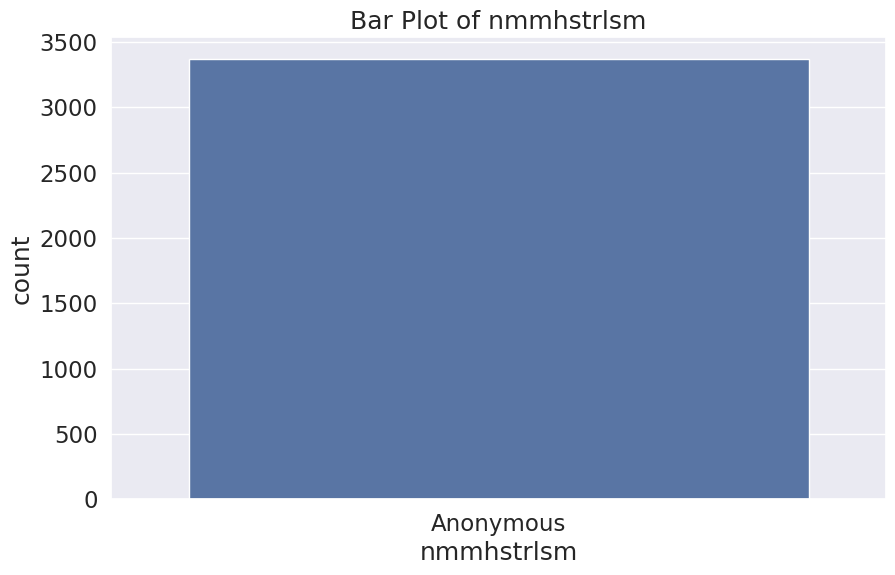

tplhrtrlsm has too many unique values, so it will not be plotted.
tglhrtrlsm has too many unique values, so it will not be plotted.


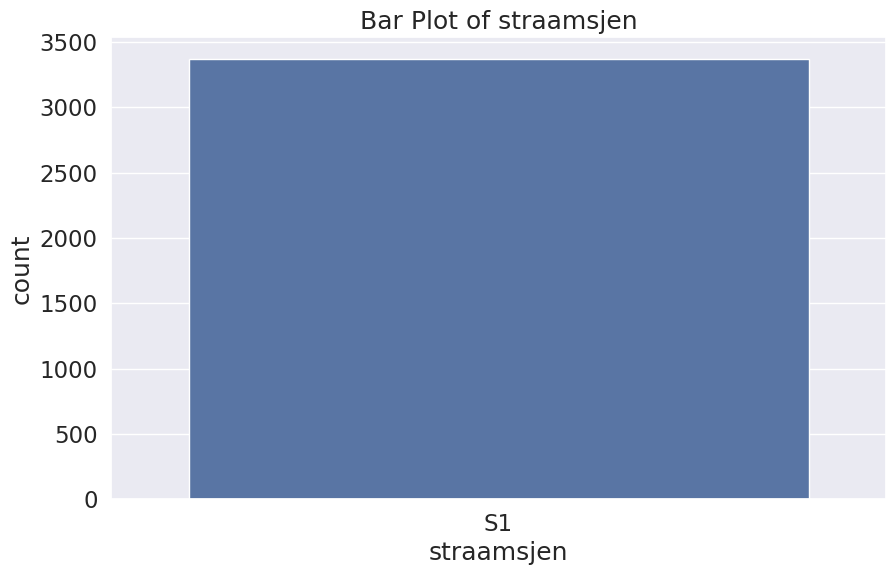

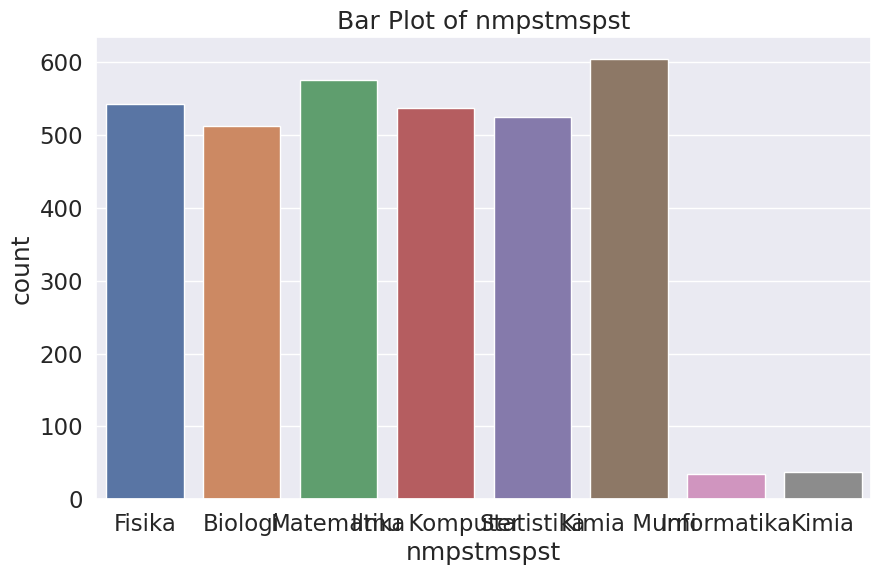

alamtrlsm has too many unique values, so it will not be plotted.


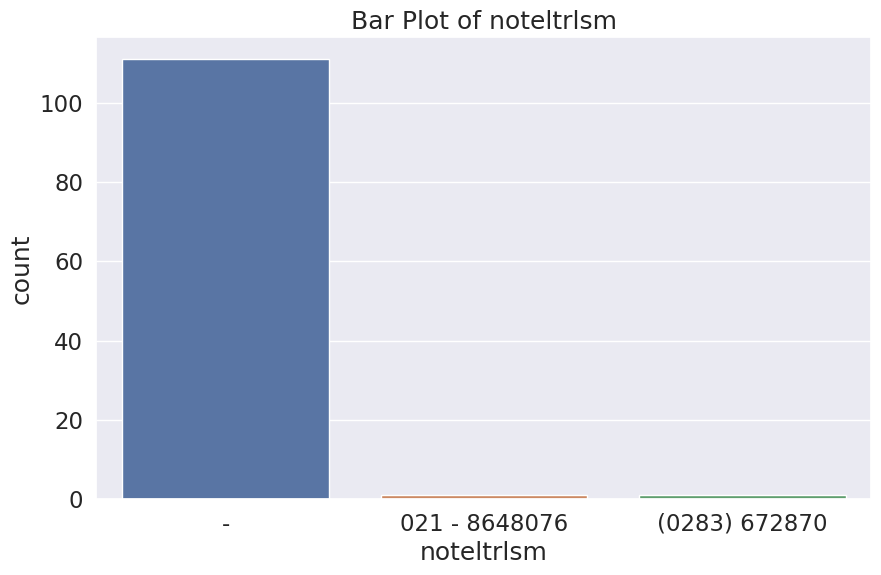

nmorttrlsm has too many unique values, so it will not be plotted.
skriptrlsm has too many unique values, so it will not be plotted.
phototrlsm has too many unique values, so it will not be plotted.


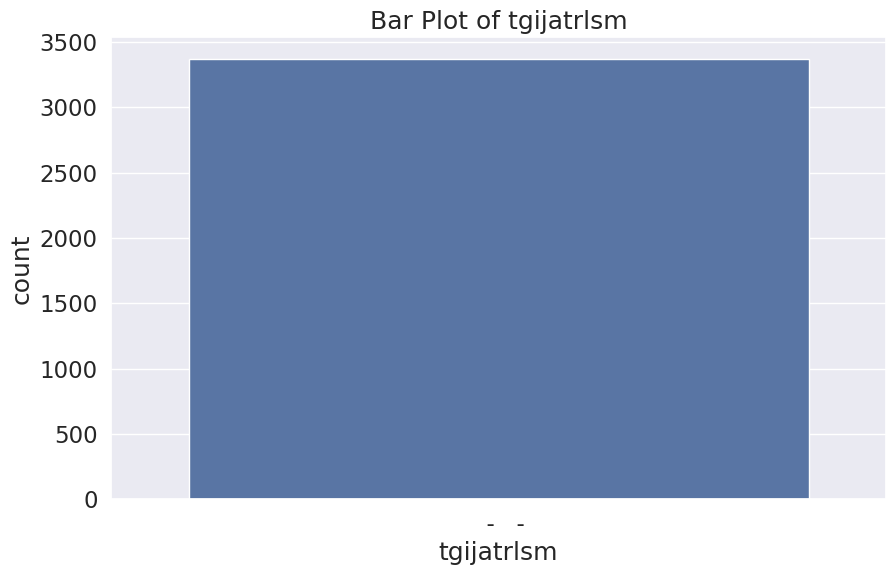

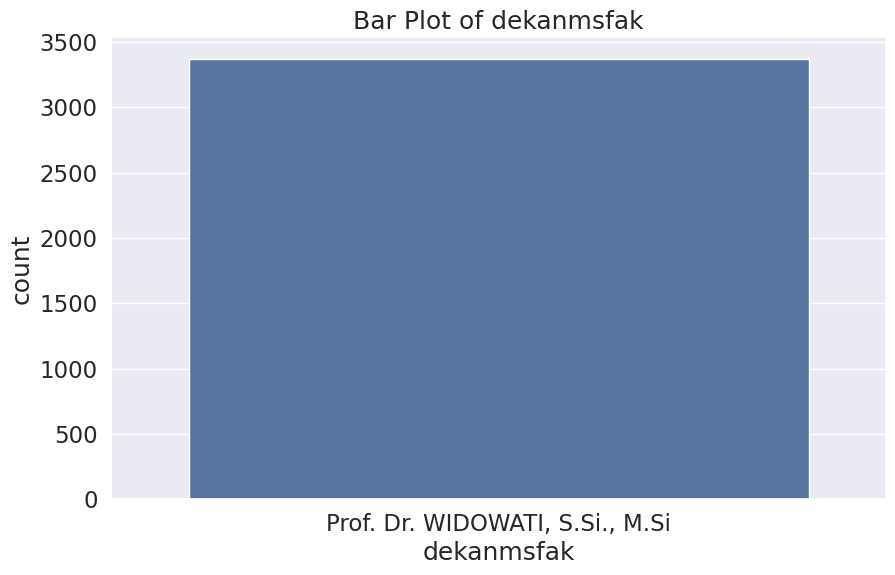

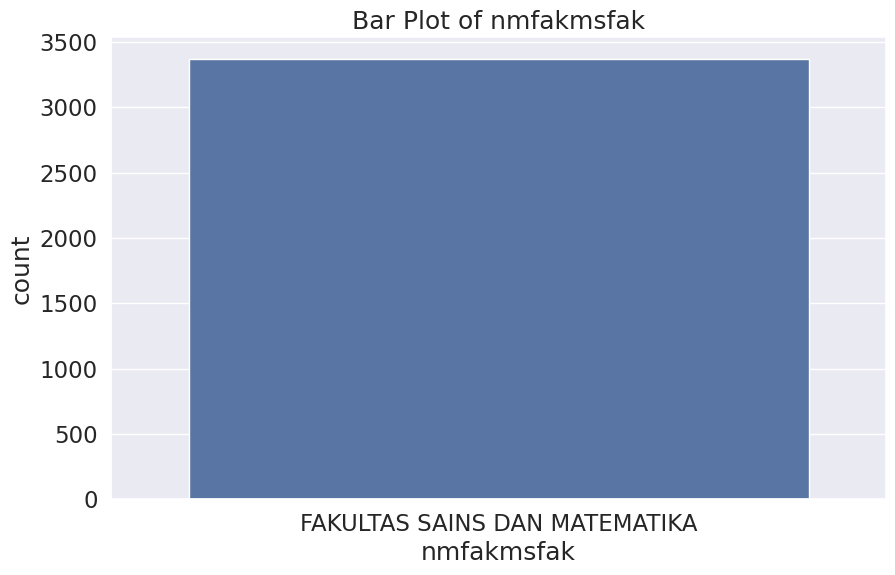

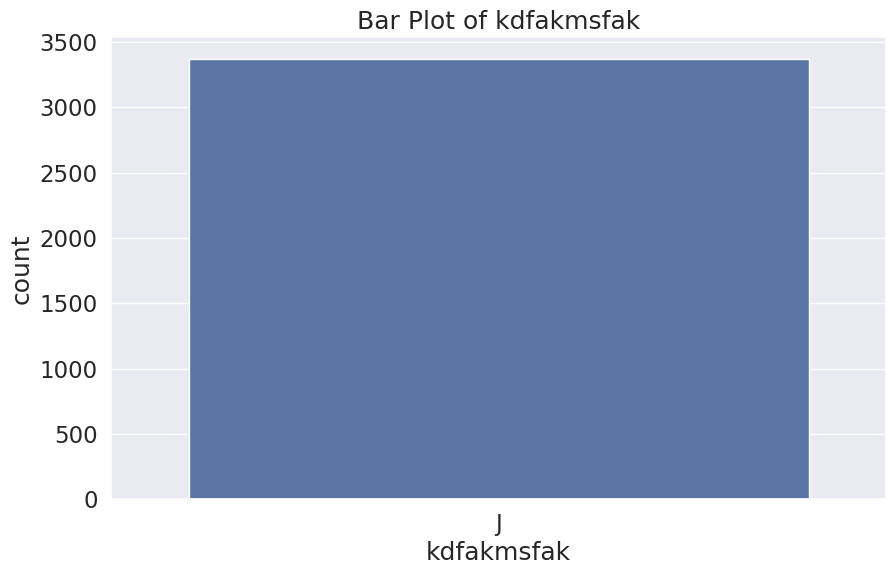

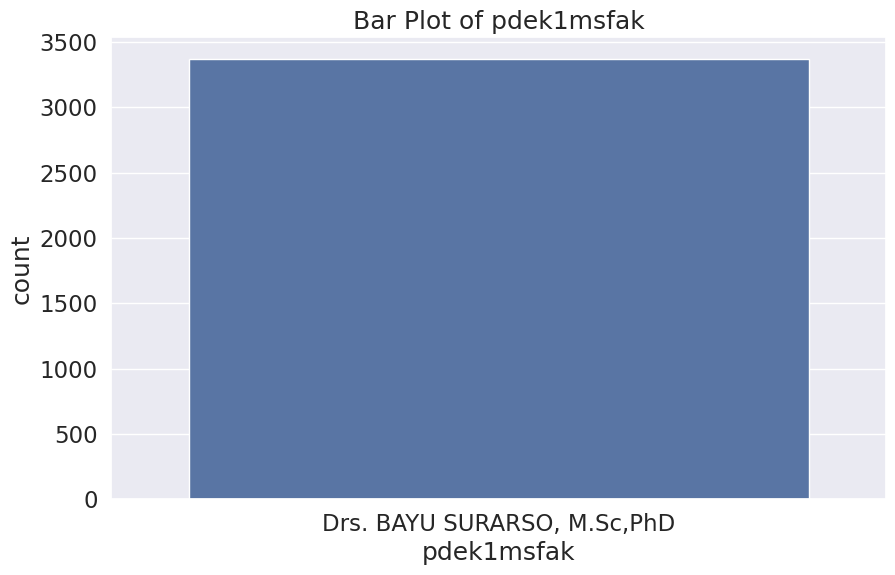

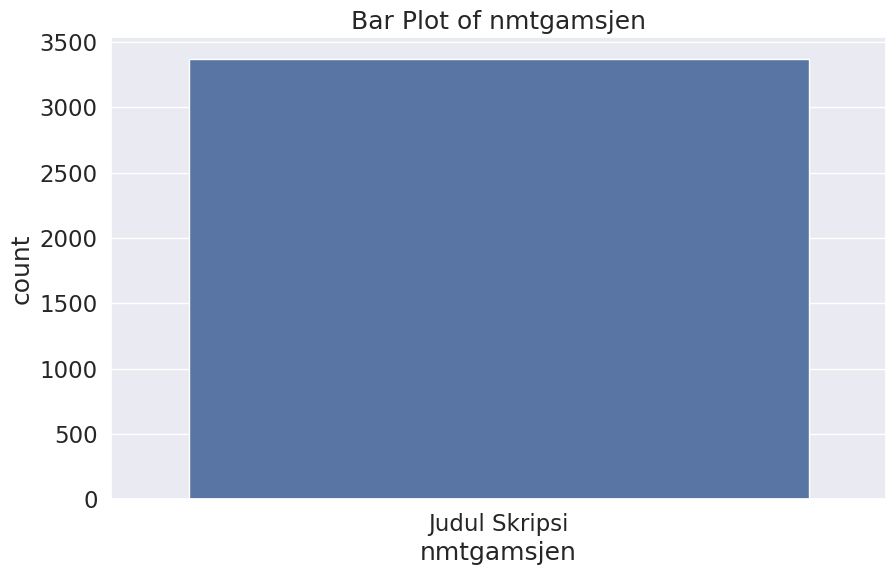

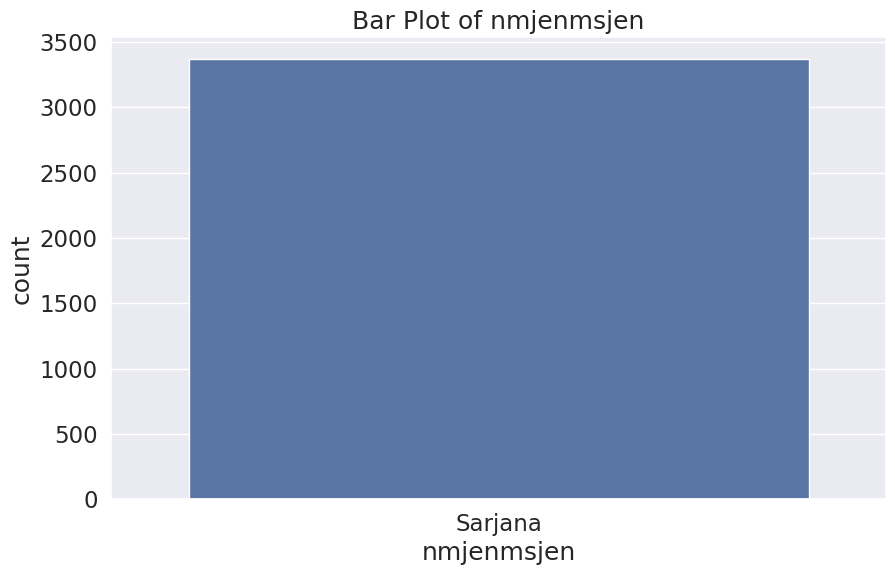

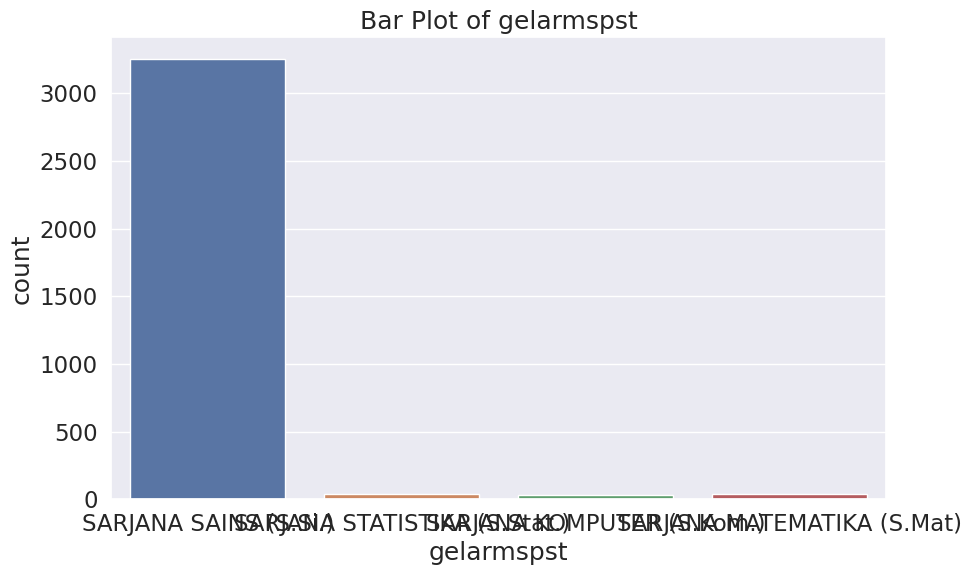

pemb1trlsm has too many unique values, so it will not be plotted.
pemb2trlsm has too many unique values, so it will not be plotted.


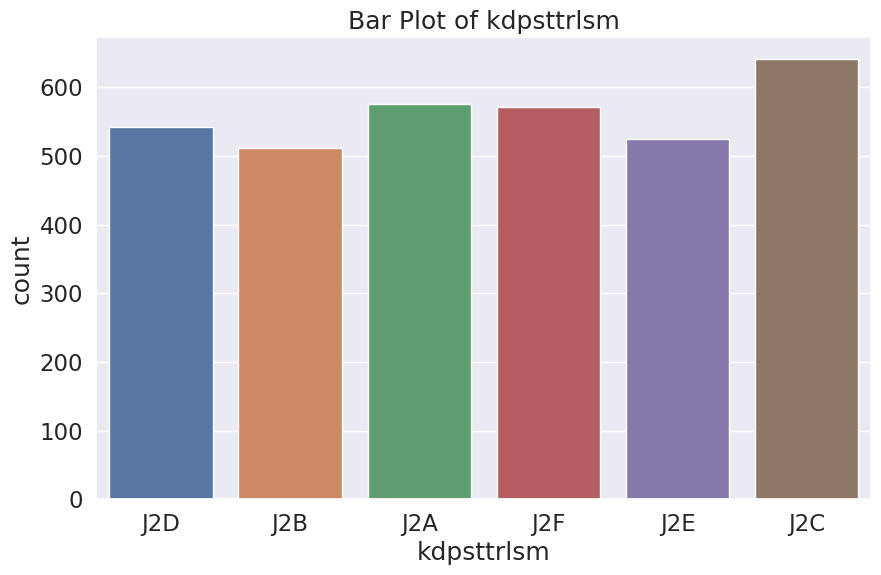

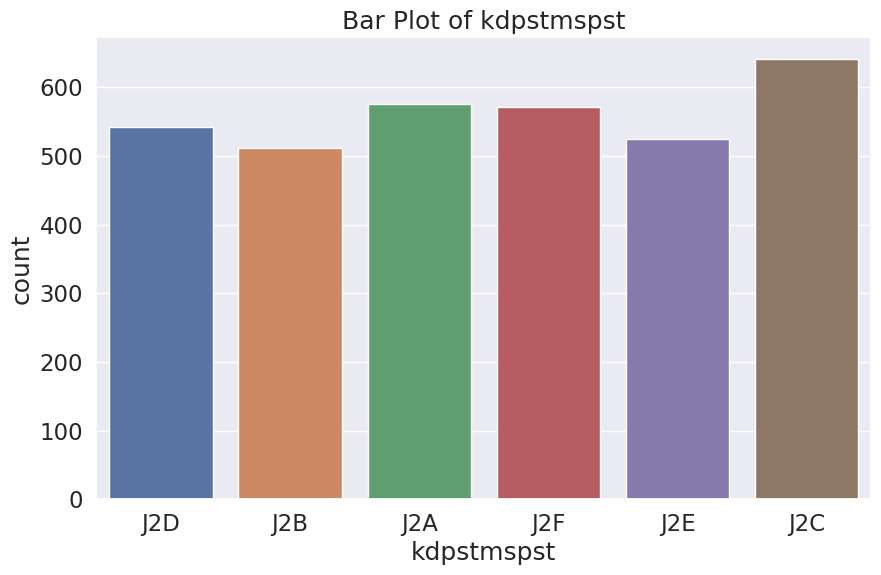

In [ ]:
# Daftar kolom non-numerik dalam dataset Anda
non_numerical_columns = ['nimhstrlsm', 'nmmhstrlsm', 'tplhrtrlsm', 'tglhrtrlsm', 'straamsjen', 'nmpstmspst', 'alamtrlsm', 'noteltrlsm', 'nmorttrlsm', 'skriptrlsm', 'phototrlsm', 'tgijatrlsm', 'dekanmsfak', 'nmfakmsfak', 'kdfakmsfak', 'pdek1msfak', 'nmtgamsjen', 'nmjenmsjen', 'gelarmspst', 'pemb1trlsm', 'pemb2trlsm', 'kdpsttrlsm', 'kdpstmspst']

for col in non_numerical_columns:
    # Cek apakah jumlah kategori kurang dari 10
    if train[col].nunique() < 10:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=train, x=col)
        plt.title(f'Bar Plot of {col}')
        plt.show()
    else:
        print(f'{col} has too many unique values, so it will not be plotted.')


###Verify Data Quality

Detect duplicate value

In [ ]:
train.duplicated().sum()

0

Detect missing value

In [ ]:
# Display the number of missing values in each column
print(train.isnull().sum())

index             0
nimhstrlsm        0
nmmhstrlsm        0
tplhrtrlsm        0
tglhrtrlsm        0
straamsjen        0
nmpstmspst        0
llsketrlsm        0
nlipktrlsm        0
toefltrlsm        0
noijftrlsm     3368
stwsdtrlsm        0
noijutrlsm     3368
alamtrlsm         0
noteltrlsm     3255
nmorttrlsm        2
skriptrlsm        2
phototrlsm        0
jcutitrlsm        0
tgijatrlsm        0
tahuntrlsm      443
preditrlsm        0
skrettrlsm     3367
tgrettrlsm        0
kdjektrlsm        0
dekanmsfak        0
nipnsmsfak        0
nmfakmsfak        0
kdfakmsfak        0
pdek1msfak        0
nipn1msfak        0
nmtgamsjen        0
kdjenmsjen        0
nmjenmsjen        0
gelarmspst        0
kursitrlsm     1131
pemb1trlsm        4
pemb2trlsm      868
kdpsttrlsm        0
kdpstmspst        0
jalur             0
tepat_waktu       0
dtype: int64


##Data Preparation

###Handle Missing Value

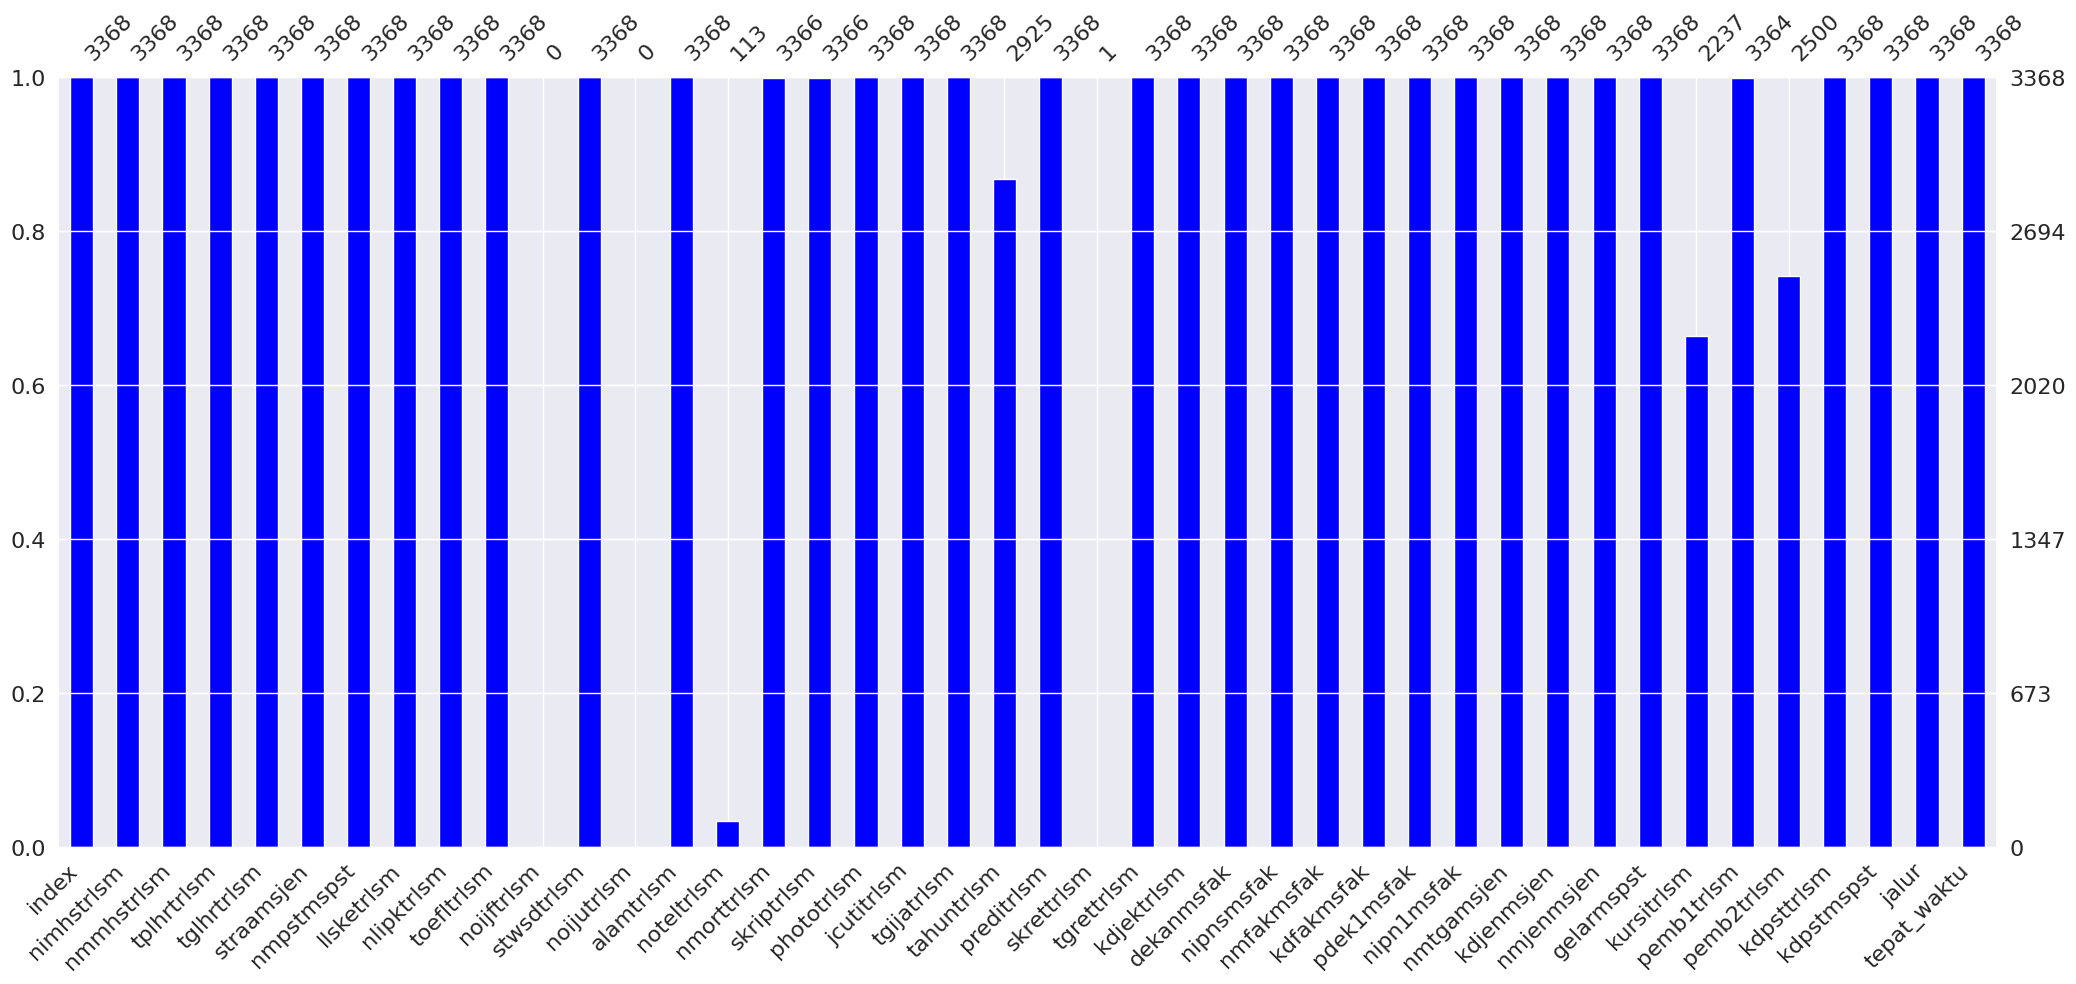

In [ ]:
import missingno as msno
# Generate the missing values matrix using missingno.bar()
msno.bar(train, color='blue')

# Display the plot
plt.show()

Drop column noijftrlsm, noijutrlsm, skrettrlsm, noteltrlsm

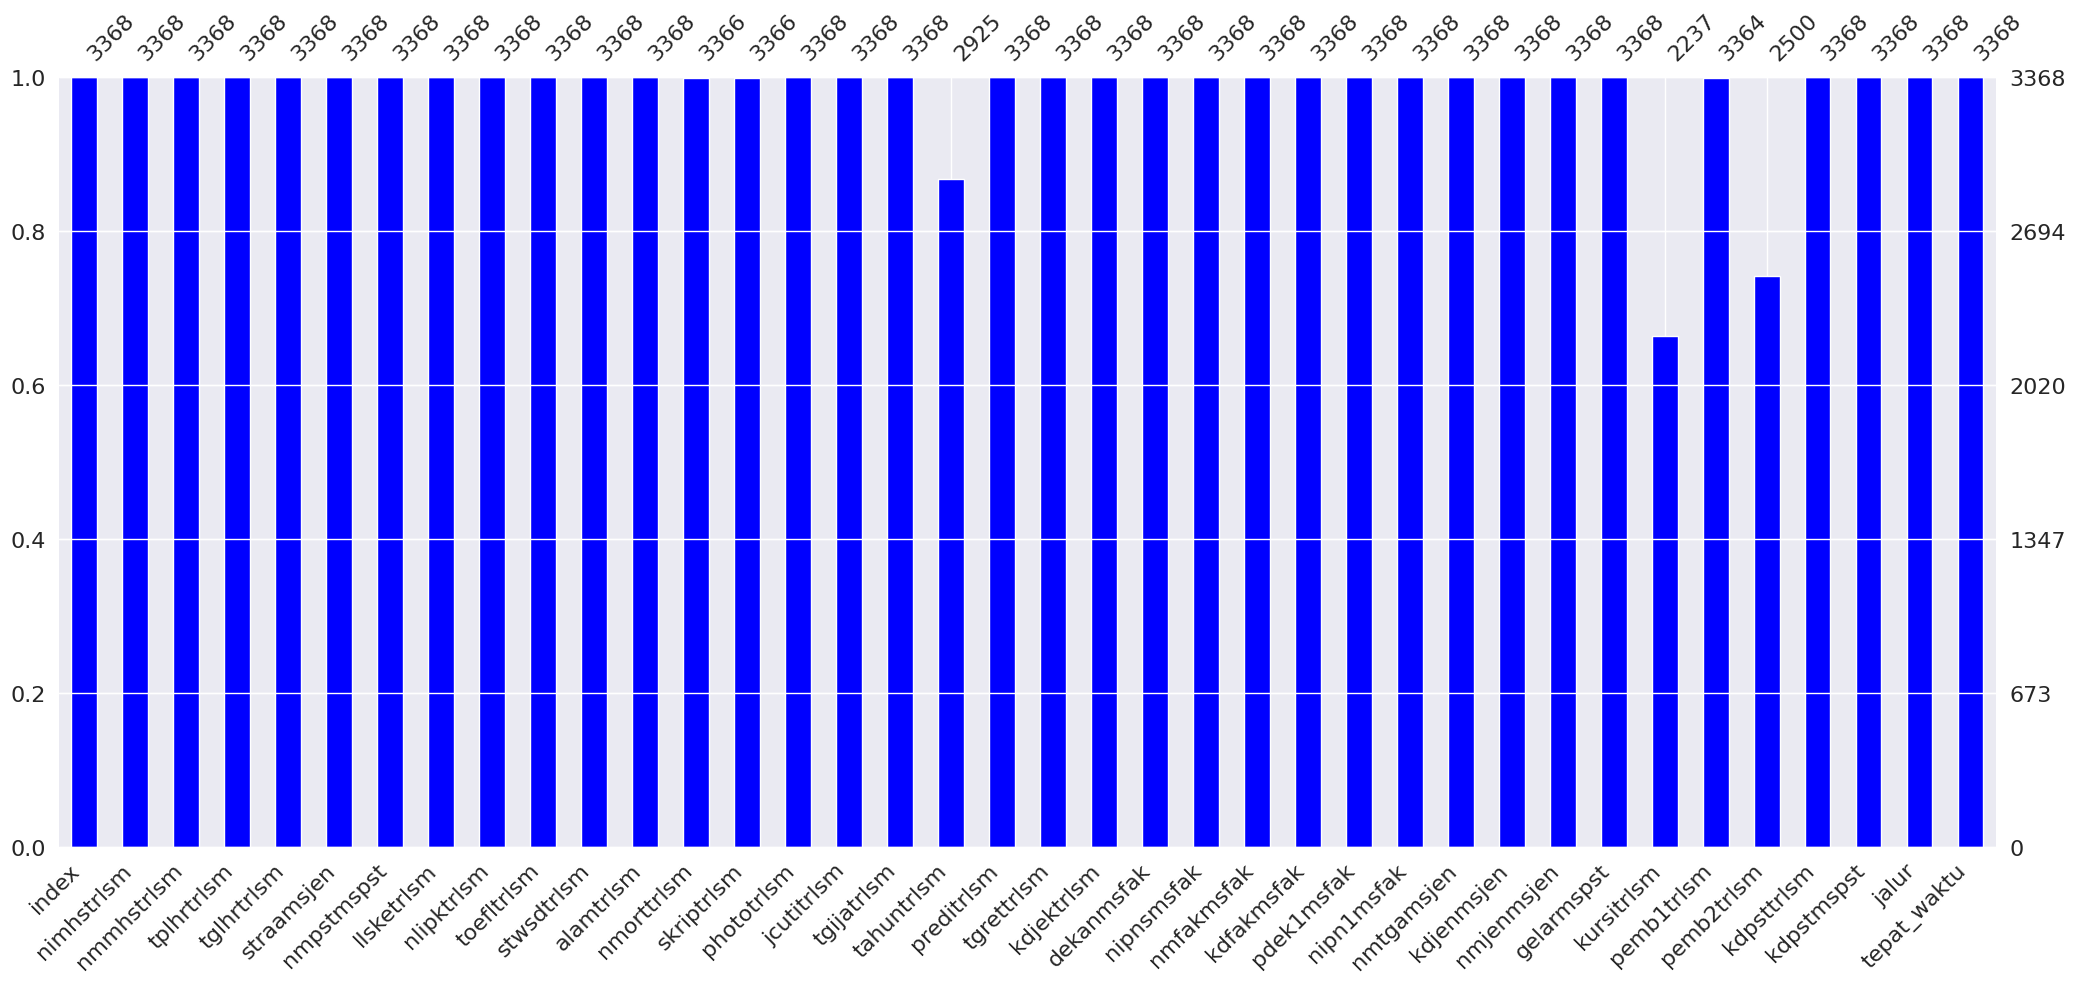

In [ ]:
train.drop(['noijftrlsm', 'noijutrlsm', 'skrettrlsm', 'noteltrlsm'], axis=1, inplace=True)
# Generate the missing values matrix using missingno.bar()
msno.bar(train, color='blue')

# Display the plot
plt.show()

Impute column kursitrlsm with mean

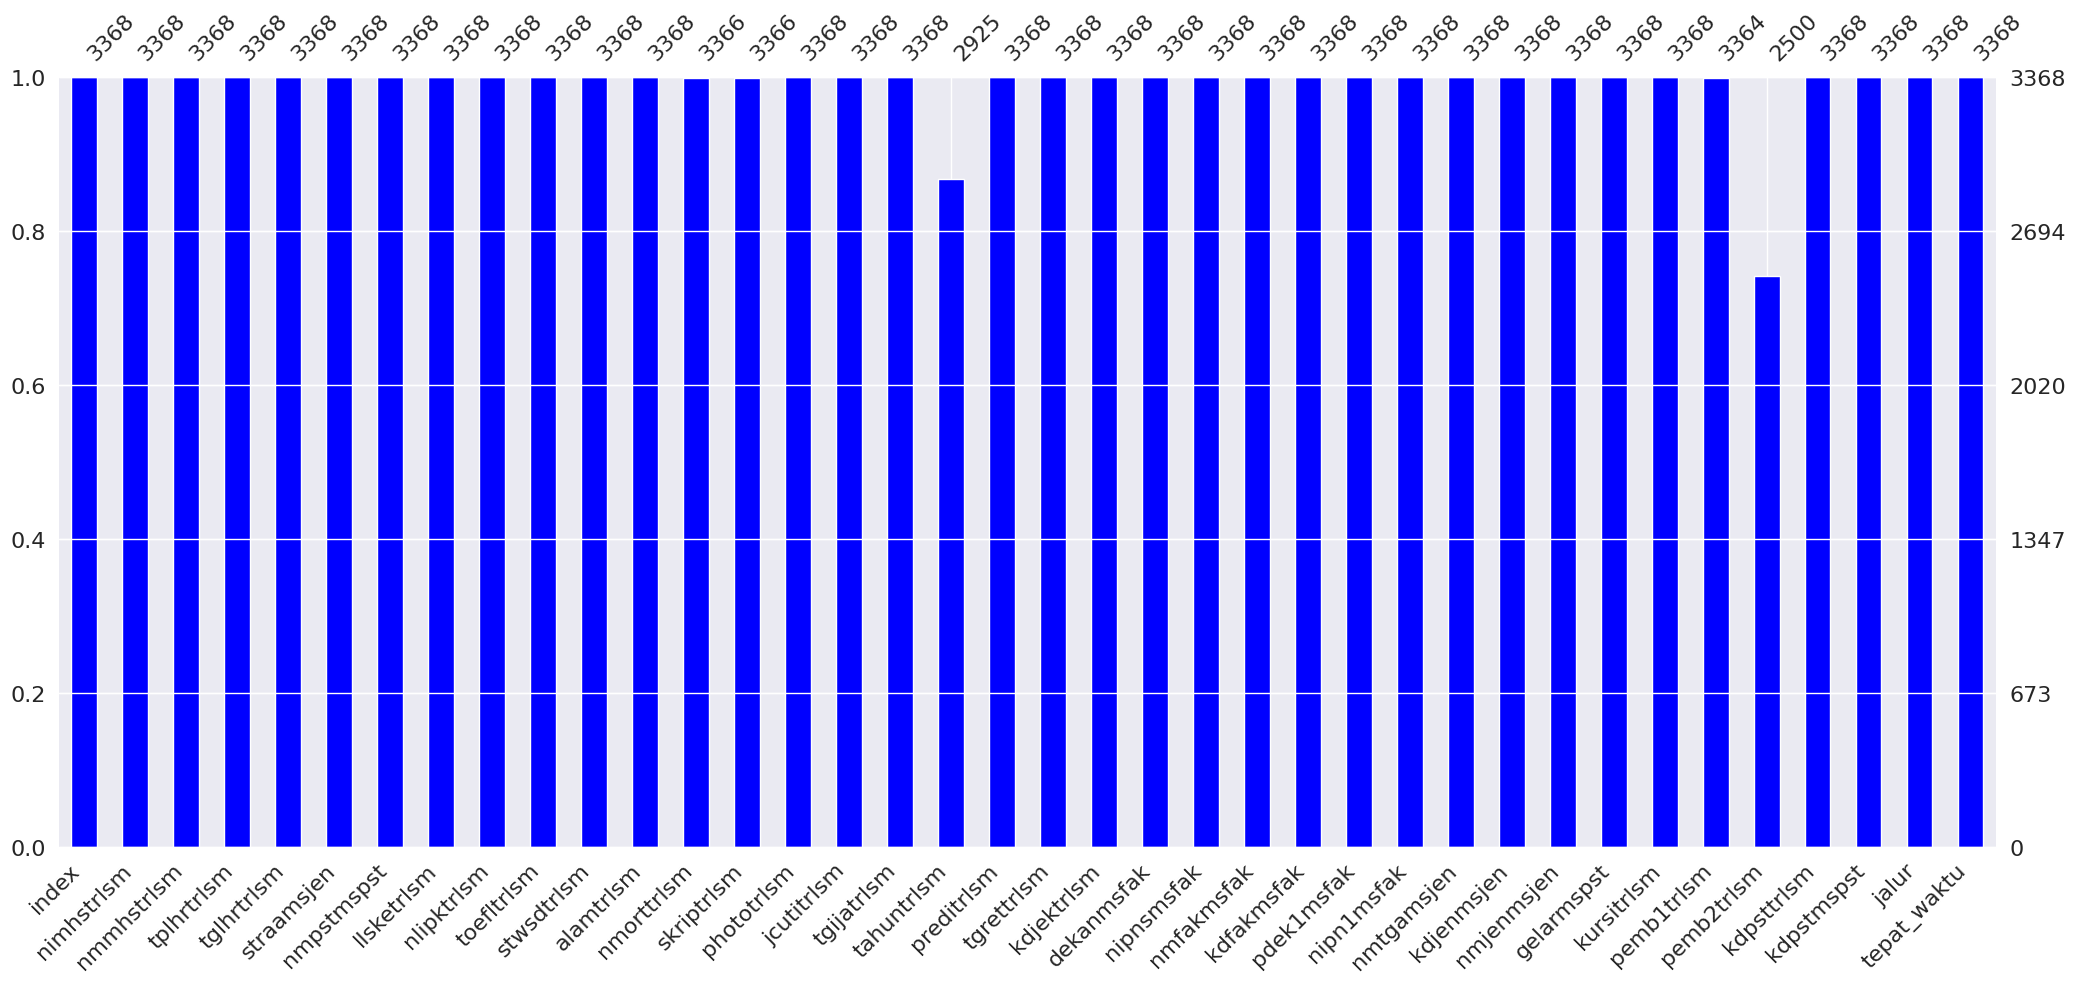

In [ ]:
from sklearn.impute import SimpleImputer

# Inisialisasi imputer dengan strategi mean
imputer = SimpleImputer(strategy='mean')

# Fit dan transform data
train['kursitrlsm'] = imputer.fit_transform(train[['kursitrlsm']])

# Generate the missing values matrix using missingno.bar()
msno.bar(train, color='blue')

# Display the plot
plt.show()

Replace column pemb2trlsm with mode

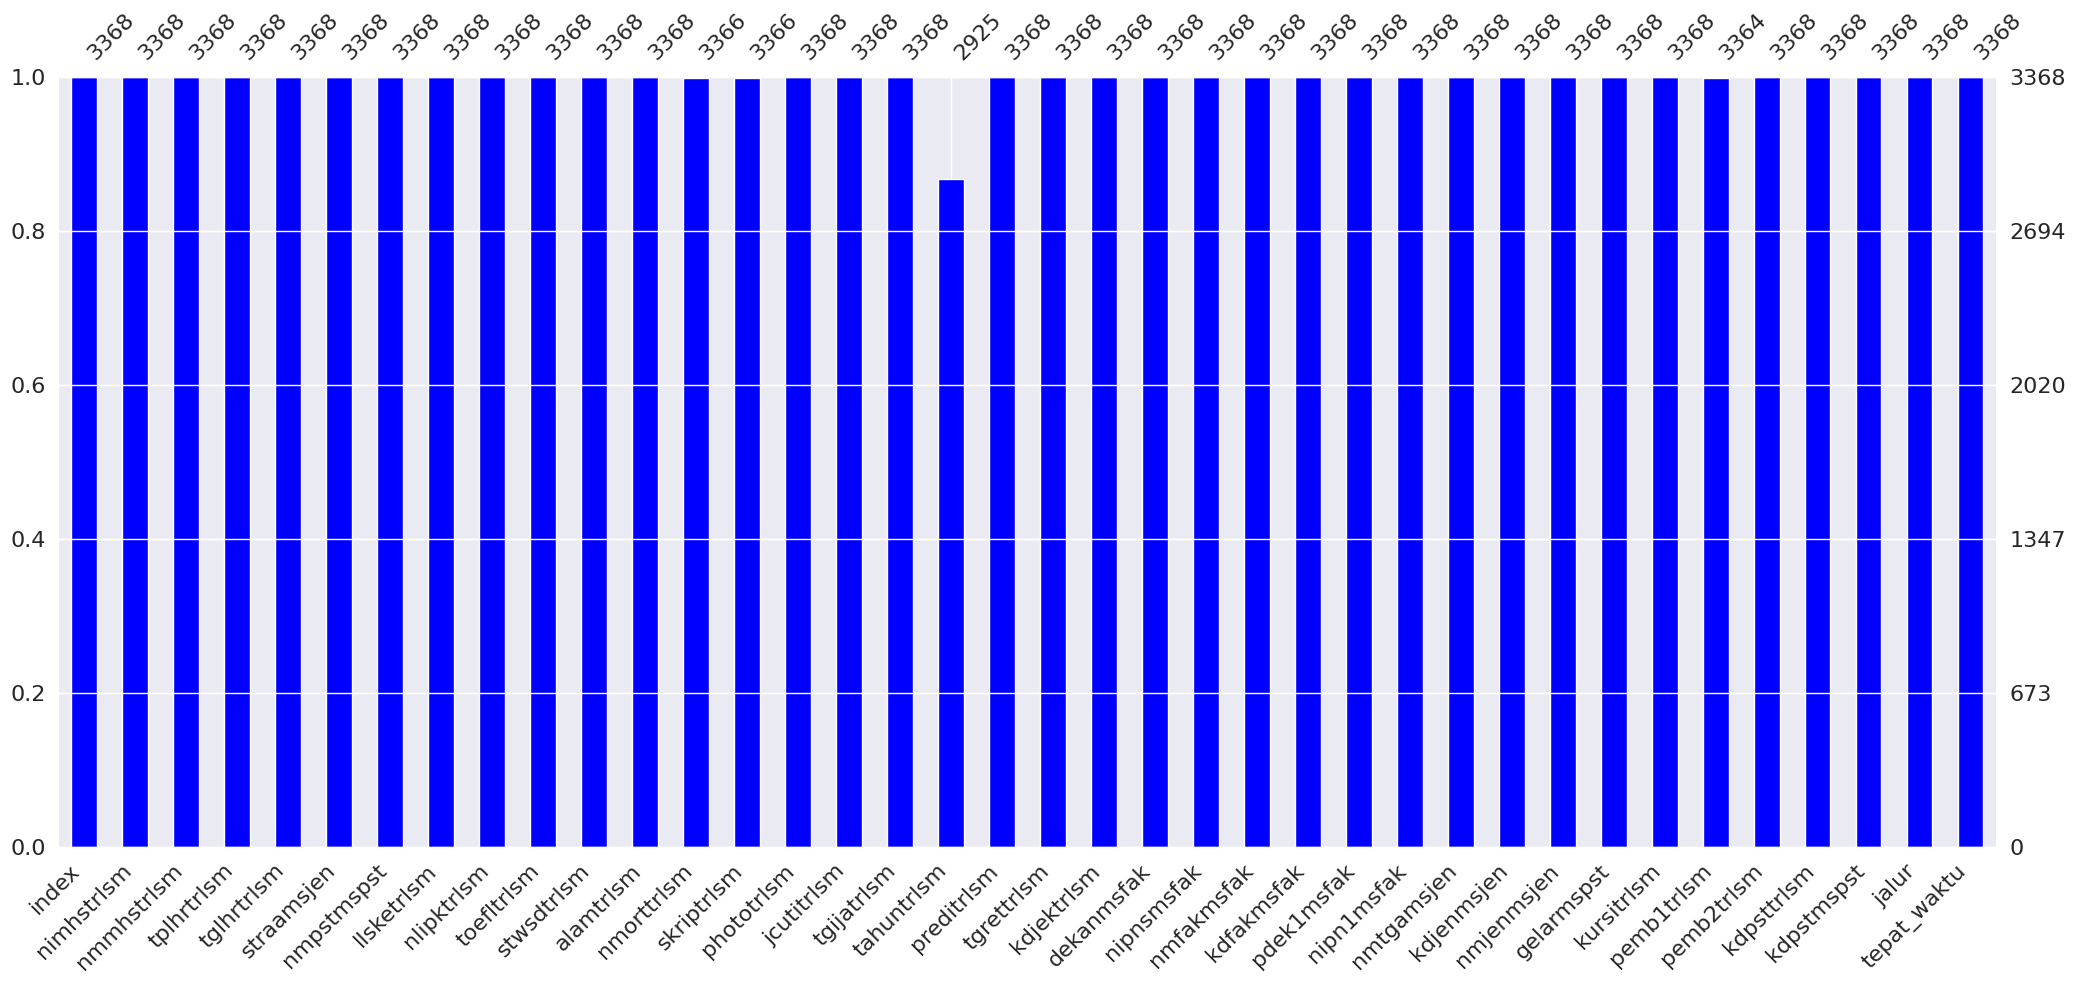

In [ ]:
mode_value = train['pemb2trlsm'].mode()[0]
train['pemb2trlsm'].fillna(mode_value, inplace=True)

# Generate the missing values matrix using missingno.bar()
msno.bar(train, color='blue')

# Display the plot
plt.show()

Replace column tahuntrlsm with median

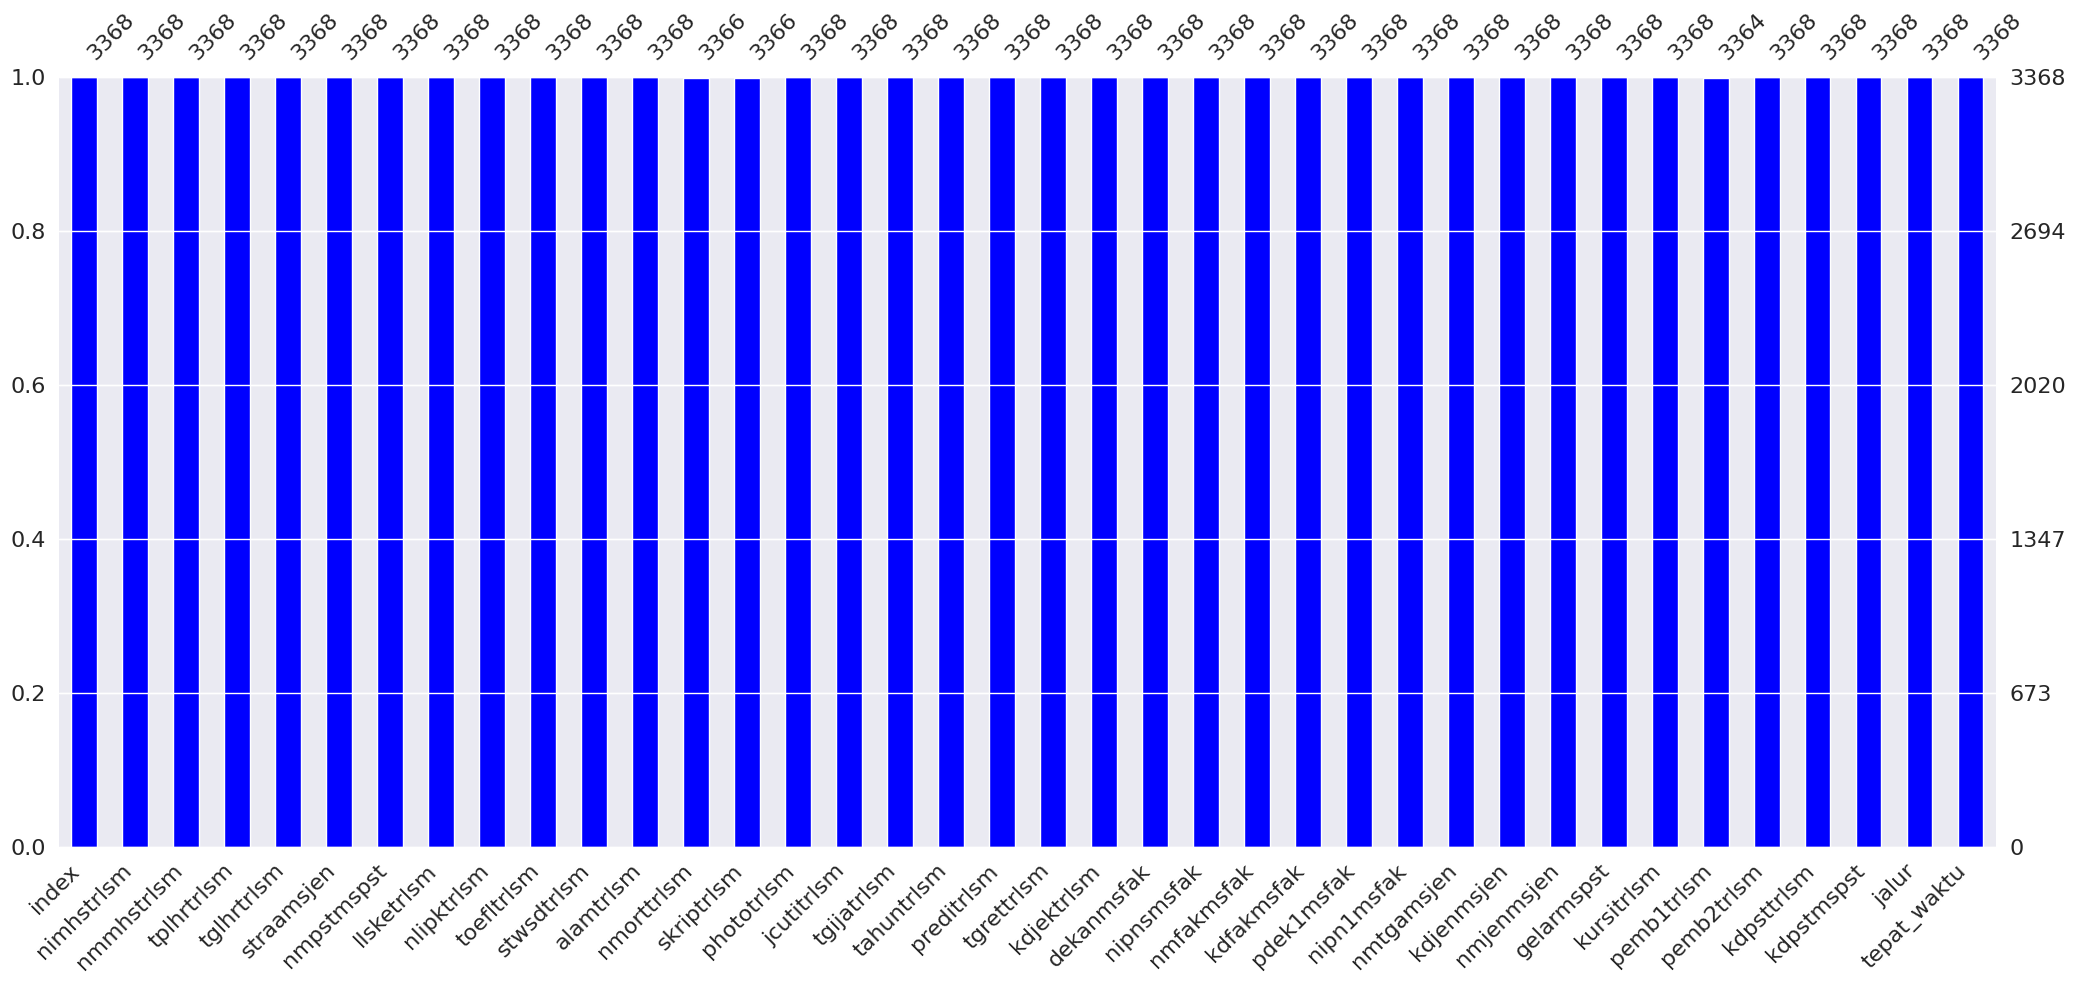

In [ ]:
median_value = train['tahuntrlsm'].median()
train['tahuntrlsm'].fillna(median_value, inplace=True)

# Generate the missing values matrix using missingno.bar()
msno.bar(train, color='blue')

# Display the plot
plt.show()

Data type of each column

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        3368 non-null   int64  
 1   nimhstrlsm   3368 non-null   object 
 2   nmmhstrlsm   3368 non-null   object 
 3   tplhrtrlsm   3368 non-null   object 
 4   tglhrtrlsm   3368 non-null   object 
 5   straamsjen   3368 non-null   object 
 6   nmpstmspst   3368 non-null   object 
 7   llsketrlsm   3368 non-null   int64  
 8   nlipktrlsm   3368 non-null   float64
 9   toefltrlsm   3368 non-null   int64  
 10  stwsdtrlsm   3368 non-null   int64  
 11  alamtrlsm    3368 non-null   object 
 12  nmorttrlsm   3366 non-null   object 
 13  skriptrlsm   3366 non-null   object 
 14  phototrlsm   3368 non-null   object 
 15  jcutitrlsm   3368 non-null   int64  
 16  tgijatrlsm   3368 non-null   object 
 17  tahuntrlsm   3368 non-null   float64
 18  preditrlsm   3368 non-null   int64  
 19  tgrett

###Pearson Correlation

<ipython-input-153-4a9a1b3c3c14>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_ordered.corr()


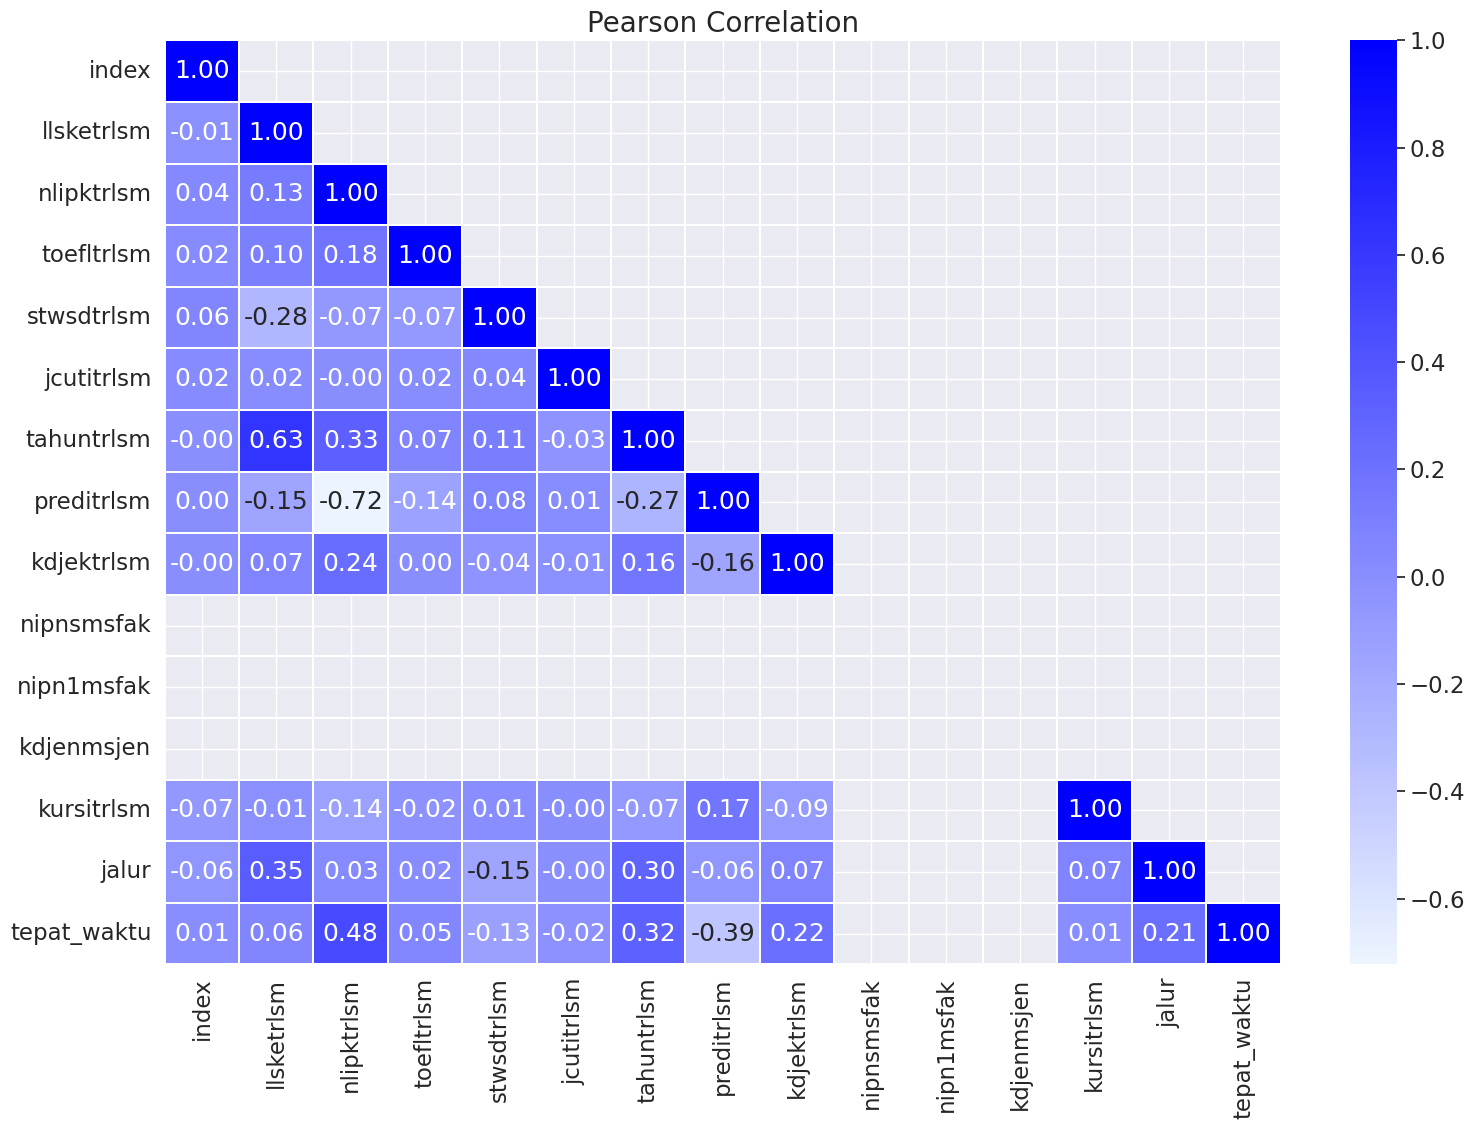

In [ ]:
import seaborn as sns
import numpy as np
# Pearson correlation
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Define a colormap
blue_cmap = LinearSegmentedColormap.from_list('blue', ['#ECF5FF', 'blue'])

# Calculation of the Spearman correlation
target = 'tepat_waktu'
df_ordered = pd.concat([train.drop(target, axis=1), train[target]], axis=1)
corr = df_ordered.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(18, 12))
sns.heatmap(corr, mask=mask, annot=True, cmap=blue_cmap, fmt='.2f', linewidths=0.2)
plt.title('Pearson Correlation', fontsize=20)
plt.show()


Drop column nipnsmsfak, nipn1msfak, kdjenmsjen

In [ ]:
train.drop(['nipnsmsfak', 'nipn1msfak', 'kdjenmsjen'], axis=1, inplace=True)

<ipython-input-155-c3b9e83c0e45>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_ordered.corr()


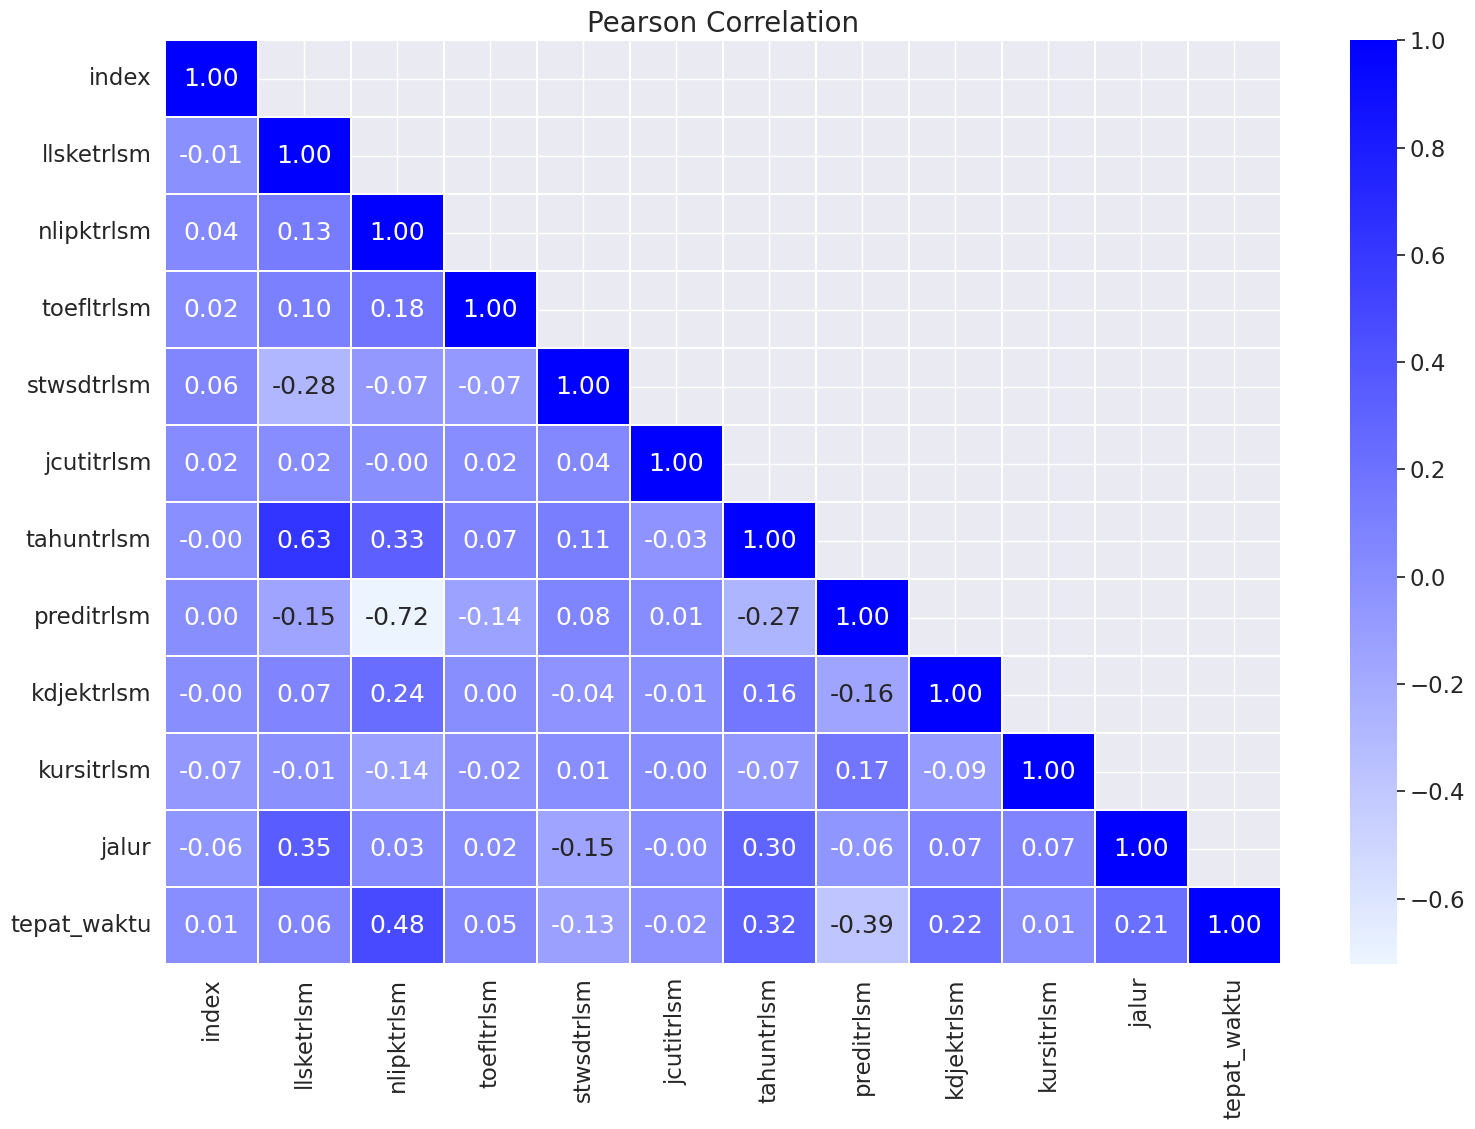

In [ ]:
import seaborn as sns
# Pearson correlation
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Define a colormap
blue_cmap = LinearSegmentedColormap.from_list('blue', ['#ECF5FF', 'blue'])

# Calculation of the Spearman correlation
target = 'tepat_waktu'
df_ordered = pd.concat([train.drop(target, axis=1), train[target]], axis=1)
corr = df_ordered.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(18, 12))
sns.heatmap(corr, mask=mask, annot=True, cmap=blue_cmap, fmt='.2f', linewidths=0.2)
plt.title('Pearson Correlation', fontsize=20)
plt.show()


In [ ]:
train.shape

(3368, 35)

###Unique Values

In [ ]:
unique_counts = train.nunique()
print(unique_counts)

index          3368
nimhstrlsm     3259
nmmhstrlsm        1
tplhrtrlsm      441
tglhrtrlsm     2076
straamsjen        1
nmpstmspst        8
llsketrlsm     3246
nlipktrlsm      155
toefltrlsm       67
stwsdtrlsm        3
alamtrlsm      3259
nmorttrlsm     2895
skriptrlsm     3259
phototrlsm     1739
jcutitrlsm        3
tgijatrlsm        1
tahuntrlsm       12
preditrlsm        2
tgrettrlsm        1
kdjektrlsm        2
dekanmsfak        1
nmfakmsfak        1
kdfakmsfak        1
pdek1msfak        1
nmtgamsjen        1
nmjenmsjen        1
gelarmspst        4
kursitrlsm      329
pemb1trlsm      734
pemb2trlsm      571
kdpsttrlsm        6
kdpstmspst        6
jalur             6
tepat_waktu       2
dtype: int64


Drop Columns with Unique Value = 1

In [ ]:
# Menemukan kolom dengan nilai unik = 1
columns_to_drop = unique_counts[unique_counts == 1].index

# Menghapus kolom-kolom tersebut dari DataFrame
train_cleaned = train.drop(columns=columns_to_drop)

# Tampilkan DataFrame setelah penghapusan
train_cleaned


,index,nimhstrlsm,tplhrtrlsm,tglhrtrlsm,nmpstmspst,llsketrlsm,nlipktrlsm,toefltrlsm,stwsdtrlsm,alamtrlsm,...,preditrlsm,kdjektrlsm,gelarmspst,kursitrlsm,pemb1trlsm,pemb2trlsm,kdpsttrlsm,kdpstmspst,jalur,tepat_waktu
0,3037,24040112140089,Semarang,1994-02-16 00:00:00,Fisika,6360,3.24,400,0,Puri Anjasmoro B2/7 Kec. Semaramg Barat 50144,...,4,1,SARJANA SAINS (S.Si.),86.000000,"Dr. Agus Subagio, M.Si","Abdul Hoyyi, M.Si",J2D,J2D,4,True
1,2063,24020111130037,Tegal,1993-04-25 00:00:00,Biologi,6100,3.48,400,0,Jl. H. Basyar No. 13 Jaticempaka Pondokgede be...,...,4,2,SARJANA SAINS (S.Si.),45.000000,"Dr. Sri Widodo AS, M.Si","Dra. Sri Haryanti, M.Si",J2B,J2B,2,False
2,2382,J2A009001,Kota Waringin Barat,1991-10-05 00:00:00,Matematika,4923,3.05,400,0,Nanggulan Rt 53 RW 19 Kulon Progo DIY,...,4,2,SARJANA SAINS (S.Si.),117.025034,"Siti Khabibah, M.Sc","Bambang Irawanto, M.Si",J2A,J2A,0,True
3,2770,J2D008004,Tanah Datar,1990-06-05 00:00:00,Fisika,5307,3.06,420,0,Jl. Pulau Mainan II Kec. Koto Salak Kab. Dharm...,...,4,1,SARJANA SAINS (S.Si.),117.025034,"Dr. Eng. Udi Harmoko, M.Si","Ir. Sugeng Widada, M.Si",J2D,J2D,0,False
4,3259,J2F008128,Kab. Semarang,1989-09-09 00:00:00,Ilmu Komputer,6047,2.88,400,0,Tlogo Mayong RtT03/ 05 Gondoriyo Kec. Jambu Ka...,...,4,2,SARJANA SAINS (S.Si.),198.000000,"Indra Waspada, M.Ti","Abdul Hoyyi, M.Si",J2F,J2F,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,1895,J2B007006,Serang,1989-01-05 00:00:00,Biologi,4384,3.39,400,1,Komplek SMA N I Serang No. 66 RT 04/ RW 05 Cim...,...,4,2,SARJANA SAINS (S.Si.),117.025034,"Drs. Agung Suprihadi, M.Si","Drs. Budi Raharjo, M.Si",J2B,J2B,0,False
3364,894,24010311130066,Boyolali,1992-11-24 00:00:00,Ilmu Komputer,7070,3.51,440,0,Jl. Kartika No. 4 Rt 03/ RW 01 Gladafsari Ampe...,...,4,1,SARJANA SAINS (S.Si.),131.000000,"Helmie Arif Wibawa, M.CS","Abdul Hoyyi, M.Si",J2F,J2F,1,False
3365,1625,24040114140110,Bandung,1995-08-20 00:00:00,Fisika,7782,3.56,427,0,Komplek Permata Cimahi Jl Safir I no. 8 RT 03 ...,...,2,2,SARJANA SAINS (S.Si.),44.000000,Ir. Hernowo Danusaputro,"Abdul Hoyyi, M.Si",J2D,J2D,4,True
3366,3171,24030111120002,Bojonegoro,1993-10-23 00:00:00,Kimia Murni,5944,3.40,433,0,Jl. Raya Bojonegor Cepu Ds Mayanggeneng RT 02 ...,...,4,2,SARJANA SAINS (S.Si.),109.000000,"Ngadiwiyana, M.Si","Dra. enny Fachriyah, M.Si",J2C,J2C,3,True


In [ ]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        3368 non-null   int64  
 1   nimhstrlsm   3368 non-null   object 
 2   tplhrtrlsm   3368 non-null   object 
 3   tglhrtrlsm   3368 non-null   object 
 4   nmpstmspst   3368 non-null   object 
 5   llsketrlsm   3368 non-null   int64  
 6   nlipktrlsm   3368 non-null   float64
 7   toefltrlsm   3368 non-null   int64  
 8   stwsdtrlsm   3368 non-null   int64  
 9   alamtrlsm    3368 non-null   object 
 10  nmorttrlsm   3366 non-null   object 
 11  skriptrlsm   3366 non-null   object 
 12  phototrlsm   3368 non-null   object 
 13  jcutitrlsm   3368 non-null   int64  
 14  tahuntrlsm   3368 non-null   float64
 15  preditrlsm   3368 non-null   int64  
 16  kdjektrlsm   3368 non-null   int64  
 17  gelarmspst   3368 non-null   object 
 18  kursitrlsm   3368 non-null   float64
 19  pemb1t

In [ ]:
# Menampilkan semua kolom dari DataFrame
print(train_cleaned.columns)


Index(['index', 'nimhstrlsm', 'tplhrtrlsm', 'tglhrtrlsm', 'nmpstmspst',
       'llsketrlsm', 'nlipktrlsm', 'toefltrlsm', 'stwsdtrlsm', 'alamtrlsm',
       'nmorttrlsm', 'skriptrlsm', 'phototrlsm', 'jcutitrlsm', 'tahuntrlsm',
       'preditrlsm', 'kdjektrlsm', 'gelarmspst', 'kursitrlsm', 'pemb1trlsm',
       'pemb2trlsm', 'kdpsttrlsm', 'kdpstmspst', 'jalur', 'tepat_waktu'],
      dtype='object')


In [ ]:
unique_counts = train_cleaned.nunique()
print(unique_counts)

index          3368
nimhstrlsm     3259
tplhrtrlsm      441
tglhrtrlsm     2076
nmpstmspst        8
llsketrlsm     3246
nlipktrlsm      155
toefltrlsm       67
stwsdtrlsm        3
alamtrlsm      3259
nmorttrlsm     2895
skriptrlsm     3259
phototrlsm     1739
jcutitrlsm        3
tahuntrlsm       12
preditrlsm        2
kdjektrlsm        2
gelarmspst        4
kursitrlsm      329
pemb1trlsm      734
pemb2trlsm      571
kdpsttrlsm        6
kdpstmspst        6
jalur             6
tepat_waktu       2
dtype: int64


###Encode Categorical Data

In [ ]:
# Memilih kolom-kolom yang bukan numerik
non_numeric_columns = train_cleaned.select_dtypes(exclude=['number']).columns

# Menampilkan nama kolom yang bukan numerik
print(non_numeric_columns)


Index(['nimhstrlsm', 'tplhrtrlsm', 'tglhrtrlsm', 'nmpstmspst', 'alamtrlsm',
       'nmorttrlsm', 'skriptrlsm', 'phototrlsm', 'gelarmspst', 'pemb1trlsm',
       'pemb2trlsm', 'kdpsttrlsm', 'kdpstmspst', 'tepat_waktu'],
      dtype='object')


In [ ]:
# Menampilkan kolom nimhstrlsm
print(train_cleaned['nimhstrlsm'])


0       24040112140089
1       24020111130037
2            J2A009001
3            J2D008004
4            J2F008128
             ...      
3363         J2B007006
3364    24010311130066
3365    24040114140110
3366    24030111120002
3367    24010111120007
Name: nimhstrlsm, Length: 3368, dtype: object


In [ ]:
# Statistik Ringkasan
print("Statistik Ringkasan NIM:")
print(train_cleaned['nimhstrlsm'].describe())

Statistik Ringkasan NIM:
count               3368
unique              3259
top       24030114120037
freq                   2
Name: nimhstrlsm, dtype: object


In [ ]:
# Menampilkan kolom tplhrtrlsm
print(train_cleaned['tplhrtrlsm'])


0                  Semarang
1                     Tegal
2       Kota Waringin Barat
3               Tanah Datar
4             Kab. Semarang
               ...         
3363                 Serang
3364               Boyolali
3365                Bandung
3366             Bojonegoro
3367               Grobogan
Name: tplhrtrlsm, Length: 3368, dtype: object


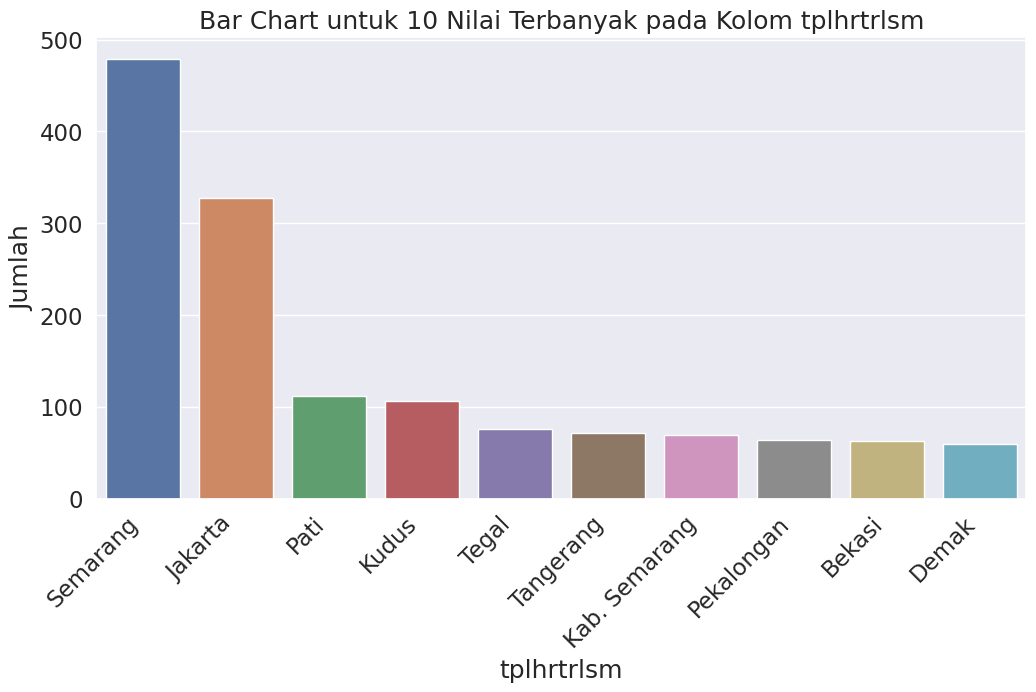

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah masing-masing nilai pada kolom 'tplhrtrlsm'
value_counts = train_cleaned['tplhrtrlsm'].value_counts()

# Mengurutkan hasil value counts dari jumlah terbesar ke terkecil
sorted_counts = value_counts.sort_values(ascending=False)

# Mengambil 10 nilai terbanyak
top_10_counts = sorted_counts.head(10)

# Menampilkan bar chart untuk 10 nilai terbanyak pada kolom 'tplhrtrlsm'
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_counts.index, y=top_10_counts.values)
plt.title('Bar Chart untuk 10 Nilai Terbanyak pada Kolom tplhrtrlsm')
plt.xlabel('tplhrtrlsm')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')  # Rotasi label untuk memudahkan membaca jika terlalu panjang
plt.show()


In [ ]:
# Menampilkan kolom tglhrtrlsm
print(train_cleaned['tglhrtrlsm'])

0       1994-02-16 00:00:00
1       1993-04-25 00:00:00
2       1991-10-05 00:00:00
3       1990-06-05 00:00:00
4       1989-09-09 00:00:00
               ...         
3363    1989-01-05 00:00:00
3364    1992-11-24 00:00:00
3365    1995-08-20 00:00:00
3366    1993-10-23 00:00:00
3367    1993-07-31 00:00:00
Name: tglhrtrlsm, Length: 3368, dtype: object


In [ ]:
# Menampilkan kolom nmpstmspst
print(train_cleaned['nmpstmspst'])


0              Fisika
1             Biologi
2          Matematika
3              Fisika
4       Ilmu Komputer
            ...      
3363          Biologi
3364    Ilmu Komputer
3365           Fisika
3366      Kimia Murni
3367       Matematika
Name: nmpstmspst, Length: 3368, dtype: object


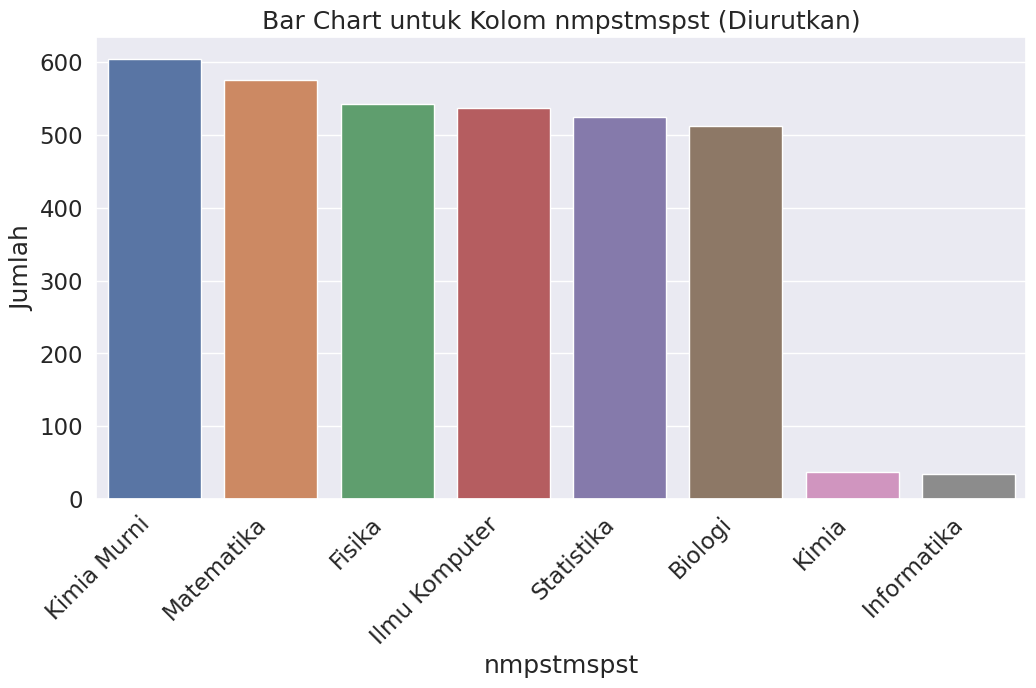

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah masing-masing nilai pada kolom 'nmpstmspst'
value_counts = train_cleaned['nmpstmspst'].value_counts()

# Mengurutkan hasil value counts dari jumlah terbesar ke terkecil
sorted_counts = value_counts.sort_values(ascending=False)

# Menampilkan bar chart untuk kolom 'nmpstmspst' yang sudah diurutkan
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_counts.index, y=sorted_counts.values)
plt.title('Bar Chart untuk Kolom nmpstmspst (Diurutkan)')
plt.xlabel('nmpstmspst')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')  # Rotasi label untuk memudahkan membaca jika terlalu panjang
plt.show()


In [ ]:
# Menampilkan kolom alamtrlsm
print(train_cleaned['alamtrlsm'])


0           Puri Anjasmoro B2/7 Kec. Semaramg Barat 50144
1       Jl. H. Basyar No. 13 Jaticempaka Pondokgede be...
2                   Nanggulan Rt 53 RW 19 Kulon Progo DIY
3       Jl. Pulau Mainan II Kec. Koto Salak Kab. Dharm...
4       Tlogo Mayong RtT03/ 05 Gondoriyo Kec. Jambu Ka...
                              ...                        
3363    Komplek SMA N I Serang No. 66 RT 04/ RW 05 Cim...
3364    Jl. Kartika No. 4 Rt 03/ RW 01 Gladafsari Ampe...
3365    Komplek Permata Cimahi Jl Safir I no. 8 RT 03 ...
3366    Jl. Raya Bojonegor Cepu Ds Mayanggeneng RT 02 ...
3367    Jl. Pangkalan 1 No. 2 RT 09 RW 07 Jengglong Ba...
Name: alamtrlsm, Length: 3368, dtype: object


In [ ]:
# Menampilkan kolom nmorttrlsm
print(train_cleaned['nmorttrlsm'])


0        Ahmad Nashirin
1                Waluyo
2              Sugiyana
3         Tjipto Gunadi
4        Sapin Juwarman
             ...       
3363        Agus Hendro
3364    Kornelius Karli
3365    H. Burzani, S.E
3366        Heri Lukito
3367      Bisri Mustofa
Name: nmorttrlsm, Length: 3368, dtype: object


In [ ]:
# Menampilkan kolom skriptrlsm
print(train_cleaned['skriptrlsm'])


0       Pengaruh Variasi Temperatur Deposisi Nanokompo...
1       Keanekaragaman Tumbuhan Berdasarkan Ciri Morfo...
2       Pelabelan Selisih Kuadrat pada Graf Khusus yan...
3       Identifikasi Struktur Bawah Permukaan Mengguna...
4       Aplikasi Pemilihan Penerima beasiswa Menggunak...
                              ...                        
3363    Pertumbuhan dan Produksi  Shiitake (Lentinus e...
3364    Implementasi Metode Eigenface dalam Pembuatan ...
3365    Pemetaan Penyebaran Resesitivitas dengan Metod...
3366    Sintesis 2-Hidroksi-N-(Naftalen-1-il) Benzamid...
3367    Analissi Modulasi Tonal Menggunakan Lintasan D...
Name: skriptrlsm, Length: 3368, dtype: object


In [ ]:
# Menampilkan kolom phototrlsm
print(train_cleaned['phototrlsm'])


0       \W2000\_photo\143\J\24040112140089.JPG
1       \W2000\_photo\141\J\24020111130037.JPG
2                     \W2000\_image\wanita.jpg
3                       \W2000\_image\pria.jpg
4            \W2000\_photo\140\J\J2F008128.JPG
                         ...                  
3363              \w2000\_photo\J2B007006 .jpg
3364    \W2000\_photo\147\J\24010311130066.JPG
3365                  \W2000\_image\wanita.jpg
3366    \W2000\_photo\140\J\24030111120002.JPG
3367    \W2000\_photo\152\J\24010111120007.JPG
Name: phototrlsm, Length: 3368, dtype: object


In [ ]:
# Menampilkan kolom gelarmspst
print(train_cleaned['gelarmspst'])


0       SARJANA SAINS (S.Si.)
1       SARJANA SAINS (S.Si.)
2       SARJANA SAINS (S.Si.)
3       SARJANA SAINS (S.Si.)
4       SARJANA SAINS (S.Si.)
                ...          
3363    SARJANA SAINS (S.Si.)
3364    SARJANA SAINS (S.Si.)
3365    SARJANA SAINS (S.Si.)
3366    SARJANA SAINS (S.Si.)
3367    SARJANA SAINS (S.Si.)
Name: gelarmspst, Length: 3368, dtype: object


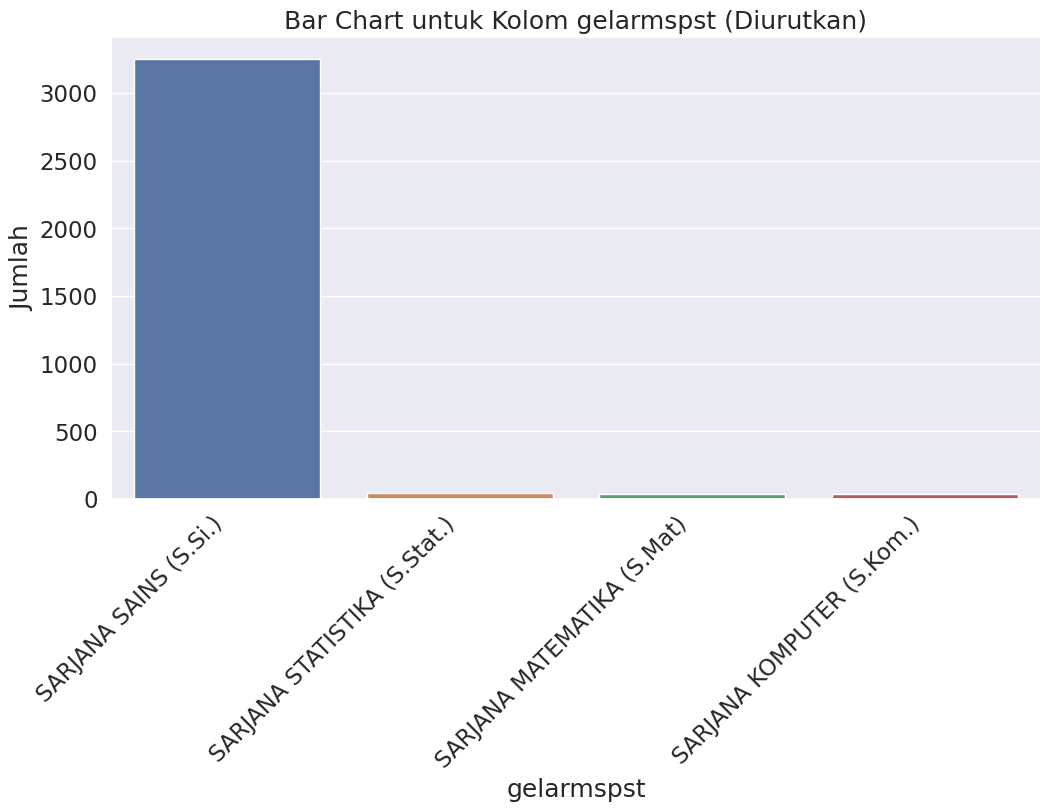

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah masing-masing nilai pada kolom 'gelarmspst'
value_counts = train_cleaned['gelarmspst'].value_counts()

# Mengurutkan hasil value counts dari jumlah terbesar ke terkecil
sorted_counts = value_counts.sort_values(ascending=False)

# Menampilkan bar chart untuk kolom 'gelarmspst' yang sudah diurutkan
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_counts.index, y=sorted_counts.values)
plt.title('Bar Chart untuk Kolom gelarmspst (Diurutkan)')
plt.xlabel('gelarmspst')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')  # Rotasi label untuk memudahkan membaca jika terlalu panjang
plt.show()


In [ ]:
# Menampilkan kolom pemb1trlsm
print(train_cleaned['pemb1trlsm'])


0           Dr. Agus Subagio, M.Si
1          Dr. Sri Widodo AS, M.Si
2              Siti Khabibah, M.Sc
3       Dr. Eng. Udi Harmoko, M.Si
4              Indra Waspada, M.Ti
                   ...            
3363    Drs. Agung Suprihadi, M.Si
3364      Helmie Arif Wibawa, M.CS
3365       Ir. Hernowo Danusaputro
3366             Ngadiwiyana, M.Si
3367                 Farikhin, PhD
Name: pemb1trlsm, Length: 3368, dtype: object


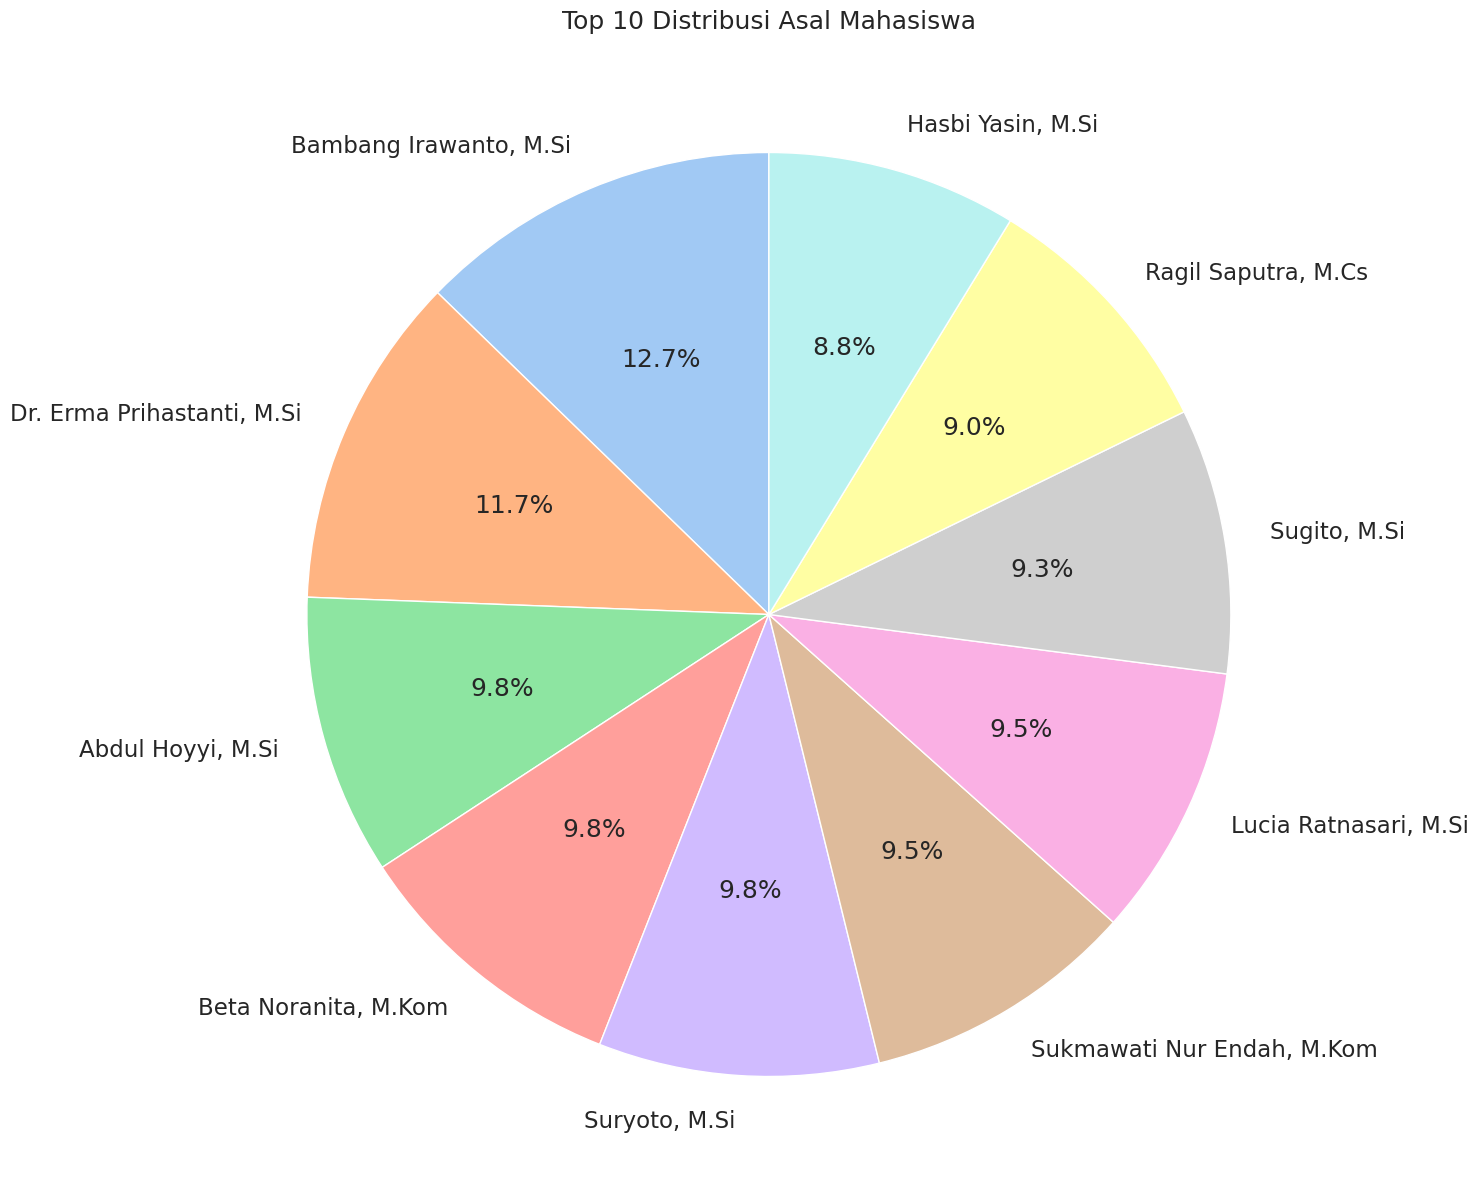

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil 10 pembina pertama dengan mahasiswa terbanyak pada kolom 'pemb1trlsm'
top_10_alamat = train_cleaned['pemb1trlsm'].value_counts().nlargest(10)

# Visualisasi pie chart untuk 10 pembina pertama dengan mahasiswa terbanyak
plt.figure(figsize=(15, 15))
top_10_alamat.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 10 Distribusi Asal Mahasiswa')
plt.ylabel('')  # Untuk menghilangkan label 'pemb1trlsm' pada sumbu y
plt.show()


In [ ]:
# Menampilkan kolom pemb2trlsm
print(train_cleaned['pemb2trlsm'])


0               Abdul Hoyyi, M.Si
1         Dra. Sri Haryanti, M.Si
2          Bambang Irawanto, M.Si
3         Ir. Sugeng Widada, M.Si
4               Abdul Hoyyi, M.Si
                  ...            
3363      Drs. Budi Raharjo, M.Si
3364            Abdul Hoyyi, M.Si
3365            Abdul Hoyyi, M.Si
3366    Dra. enny Fachriyah, M.Si
3367          Siti Khabibah, M.Sc
Name: pemb2trlsm, Length: 3368, dtype: object


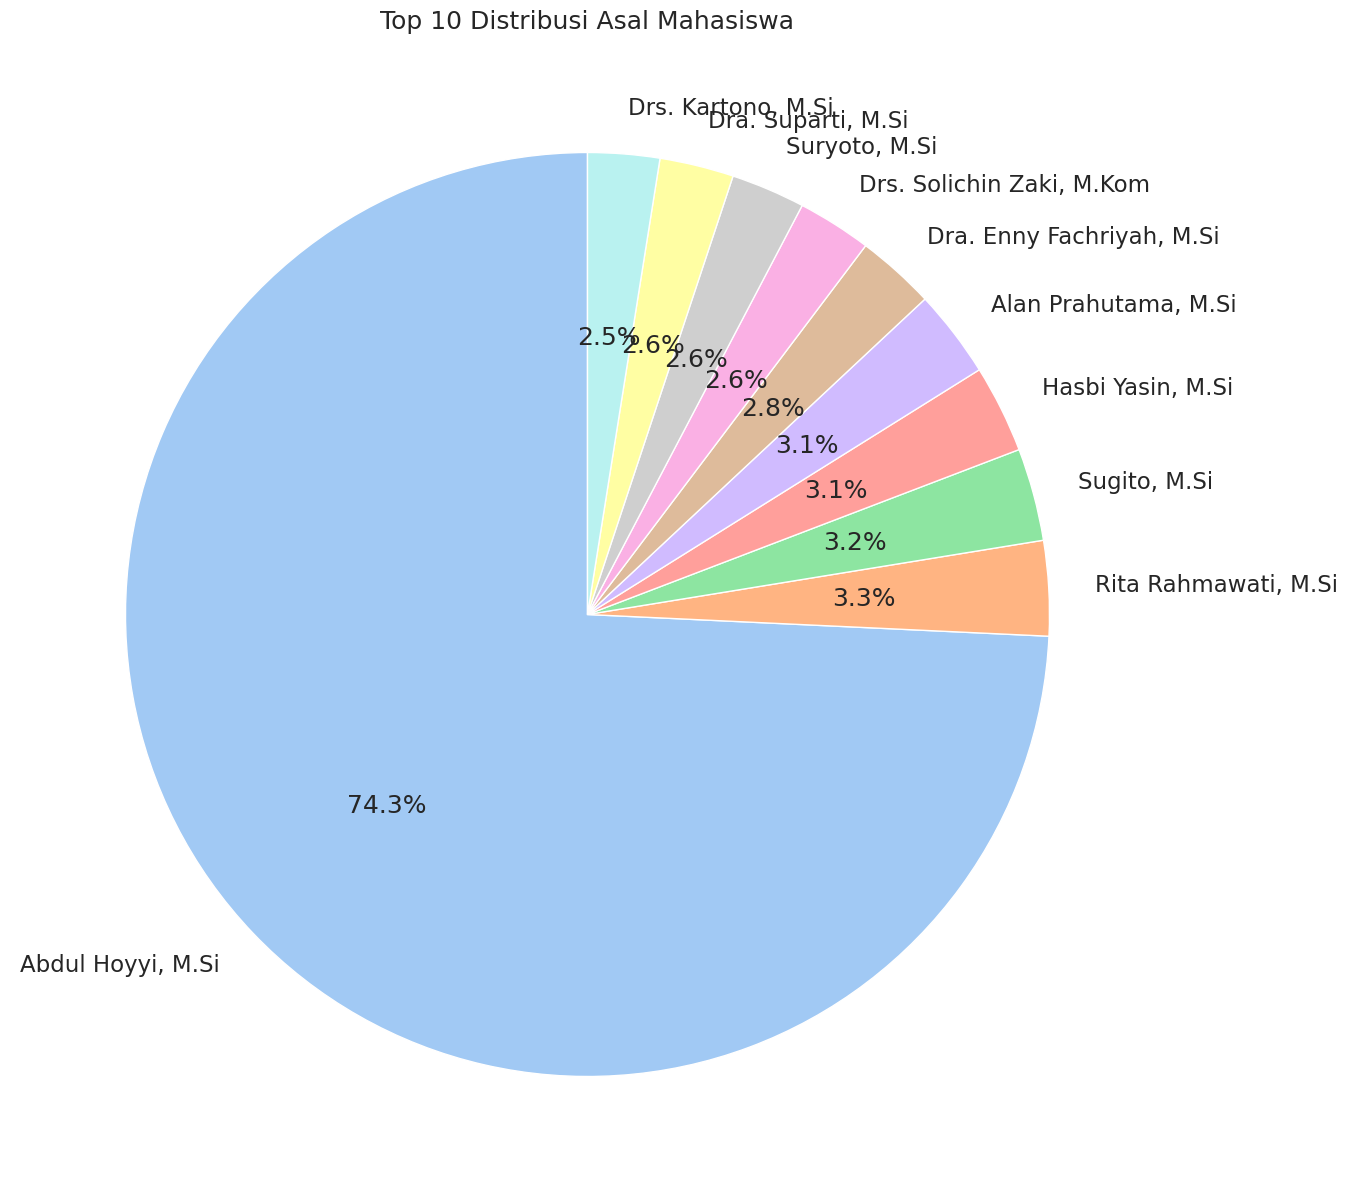

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil 10 pembina kedua dengan mahasiswa terbanyak pada kolom 'pemb2trlsm'
top_10_alamat = train_cleaned['pemb2trlsm'].value_counts().nlargest(10)

# Visualisasi pie chart untuk 10 pembina kedua dengan mahasiswa terbanyak
plt.figure(figsize=(15, 15))
top_10_alamat.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 10 Distribusi Asal Mahasiswa')
plt.ylabel('')  # Untuk menghilangkan label 'pemb2trlsm' pada sumbu y
plt.show()


In [ ]:
# Menampilkan kolom kdpsttrlsm
print(train_cleaned['kdpsttrlsm'])


0       J2D
1       J2B
2       J2A
3       J2D
4       J2F
       ... 
3363    J2B
3364    J2F
3365    J2D
3366    J2C
3367    J2A
Name: kdpsttrlsm, Length: 3368, dtype: object


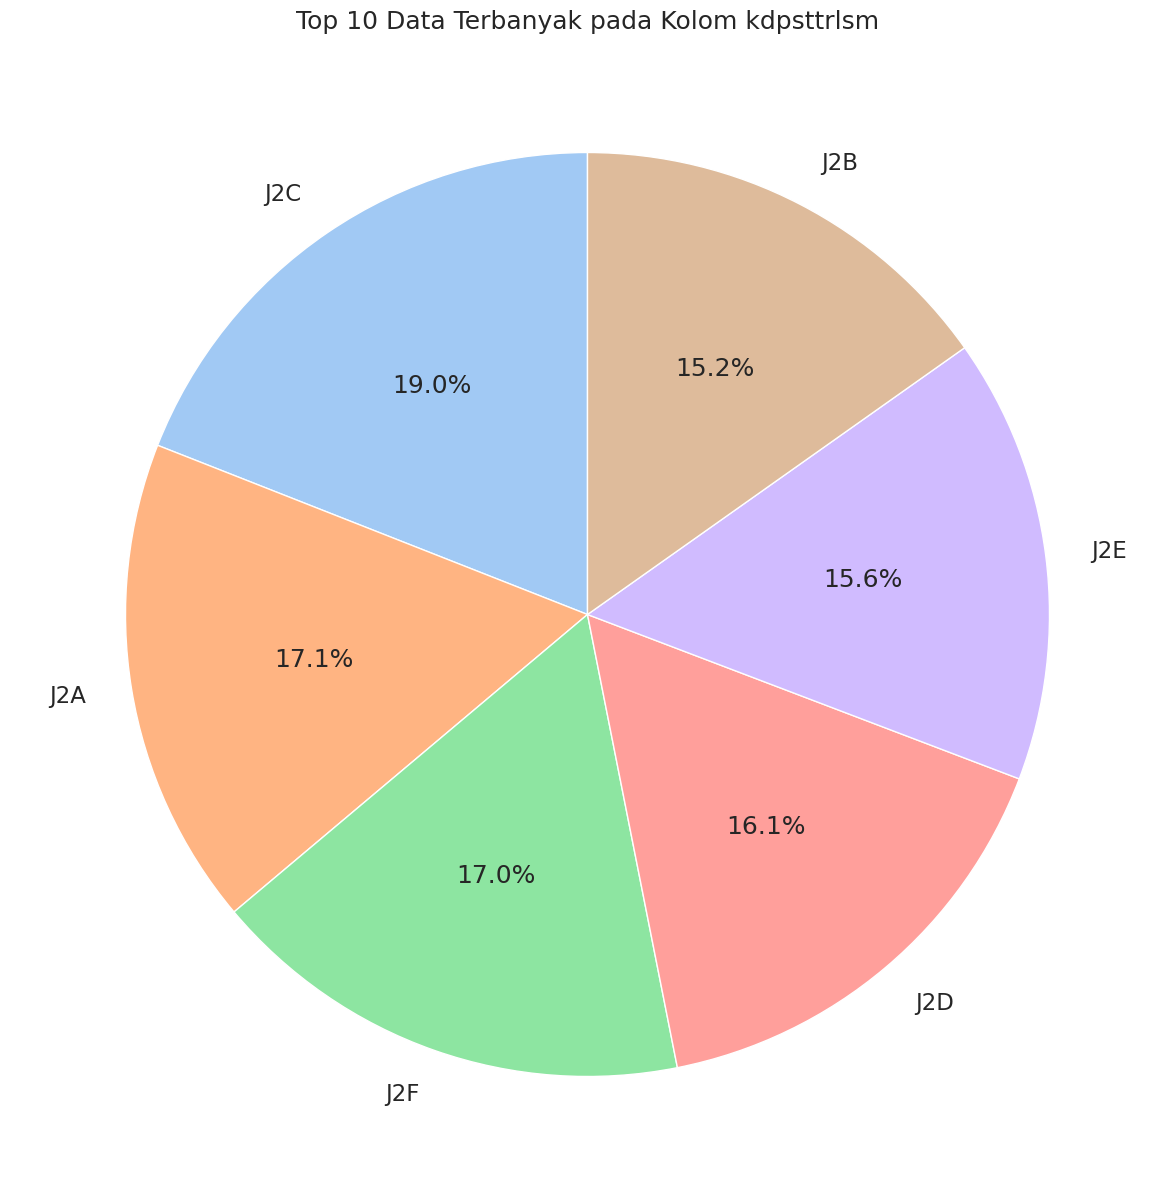

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil 10 data terbanyak pada kolom 'kdpsttrlsm'
top_10_alamat = train_cleaned['kdpsttrlsm'].value_counts().nlargest(10)

# Visualisasi pie chart untuk 10 data terbanyak
plt.figure(figsize=(15, 15))
top_10_alamat.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 10 Data Terbanyak pada Kolom kdpsttrlsm')
plt.ylabel('')  # Untuk menghilangkan label 'kdpsttrlsm' pada sumbu y
plt.show()


In [ ]:
# Menampilkan kolom kdpstmspst
print(train_cleaned['kdpstmspst'])


0       J2D
1       J2B
2       J2A
3       J2D
4       J2F
       ... 
3363    J2B
3364    J2F
3365    J2D
3366    J2C
3367    J2A
Name: kdpstmspst, Length: 3368, dtype: object


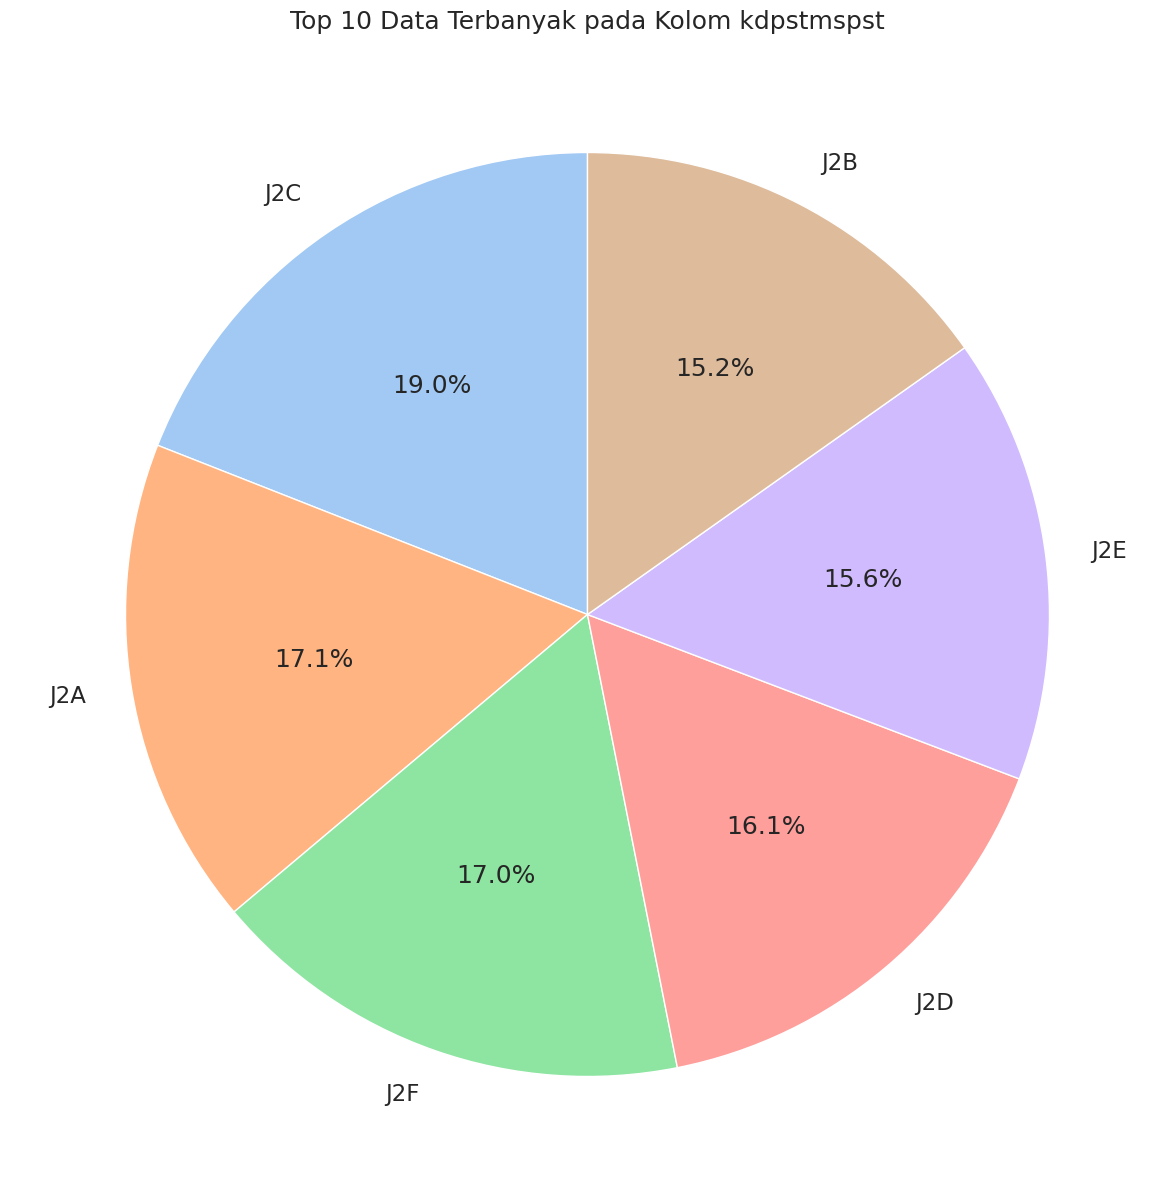

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil 10 data terbanyak pada kolom 'kdpstmspst'
top_10_alamat = train_cleaned['kdpstmspst'].value_counts().nlargest(10)

# Visualisasi pie chart untuk 10 data terbanyak
plt.figure(figsize=(15, 15))
top_10_alamat.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 10 Data Terbanyak pada Kolom kdpstmspst')
plt.ylabel('')  # Untuk menghilangkan label 'kdpstmspst' pada sumbu y
plt.show()


Encoding categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(data):
    # Encode categorical data
    le = LabelEncoder()
    categorical_columns = ['nimhstrlsm', 'tplhrtrlsm', 'tglhrtrlsm', 'nmpstmspst', 'alamtrlsm',
       'nmorttrlsm', 'skriptrlsm', 'phototrlsm', 'gelarmspst', 'pemb1trlsm',
       'pemb2trlsm', 'kdpsttrlsm', 'kdpstmspst']

    for column in categorical_columns:
        # Ensure all values are converted to strings
        data[column] = data[column].astype(str)

        # Apply label encoding
        data[column] = le.fit_transform(data[column])

    return data


After encoding

In [ ]:
train_cleaned = preprocess_data(train_cleaned)

train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        3368 non-null   int64  
 1   nimhstrlsm   3368 non-null   int64  
 2   tplhrtrlsm   3368 non-null   int64  
 3   tglhrtrlsm   3368 non-null   int64  
 4   nmpstmspst   3368 non-null   int64  
 5   llsketrlsm   3368 non-null   int64  
 6   nlipktrlsm   3368 non-null   float64
 7   toefltrlsm   3368 non-null   int64  
 8   stwsdtrlsm   3368 non-null   int64  
 9   alamtrlsm    3368 non-null   int64  
 10  nmorttrlsm   3368 non-null   int64  
 11  skriptrlsm   3368 non-null   int64  
 12  phototrlsm   3368 non-null   int64  
 13  jcutitrlsm   3368 non-null   int64  
 14  tahuntrlsm   3368 non-null   float64
 15  preditrlsm   3368 non-null   int64  
 16  kdjektrlsm   3368 non-null   int64  
 17  gelarmspst   3368 non-null   int64  
 18  kursitrlsm   3368 non-null   float64
 19  pemb1t

In [ ]:
train_cleaned

,index,nimhstrlsm,tplhrtrlsm,tglhrtrlsm,nmpstmspst,llsketrlsm,nlipktrlsm,toefltrlsm,stwsdtrlsm,alamtrlsm,...,preditrlsm,kdjektrlsm,gelarmspst,kursitrlsm,pemb1trlsm,pemb2trlsm,kdpsttrlsm,kdpstmspst,jalur,tepat_waktu
0,3037,2210,318,1206,1,6360,3.24,400,0,2970,...,4,1,2,86.000000,48,8,3,3,4,True
1,2063,1273,389,987,0,6100,3.48,400,0,1364,...,4,2,2,45.000000,250,276,1,1,2,False
2,2382,2516,159,620,6,4923,3.05,400,0,2650,...,4,2,2,117.025034,672,22,0,0,0,True
3,2770,2901,370,321,1,5307,3.06,420,0,1883,...,4,1,2,117.025034,132,410,3,3,0,False
4,3259,3209,122,187,2,6047,2.88,400,0,3184,...,4,2,2,198.000000,514,8,5,5,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,1895,2602,322,109,0,4384,3.39,400,1,2496,...,4,2,2,117.025034,377,310,1,1,0,False
3364,894,949,56,887,2,7070,3.51,440,0,1507,...,4,1,2,131.000000,503,8,5,5,1,False
3365,1625,2407,18,1607,1,7782,3.56,427,0,2488,...,2,2,2,44.000000,521,8,3,3,4,True
3366,3171,1636,53,1125,5,5944,3.40,433,0,1931,...,4,2,2,109.000000,550,289,2,2,3,True


##Modeling

###Feature selection

In [ ]:
X = train_cleaned.drop('tepat_waktu', axis=1)
y = train_cleaned['tepat_waktu']

Top 10 important features:
       Feature  Importance
6   nlipktrlsm    0.230021
5   llsketrlsm    0.106165
0        index    0.091840
12  phototrlsm    0.069198
14  tahuntrlsm    0.068235
3   tglhrtrlsm    0.064555
1   nimhstrlsm    0.054284
18  kursitrlsm    0.051138
22  kdpstmspst    0.033991
23       jalur    0.029447


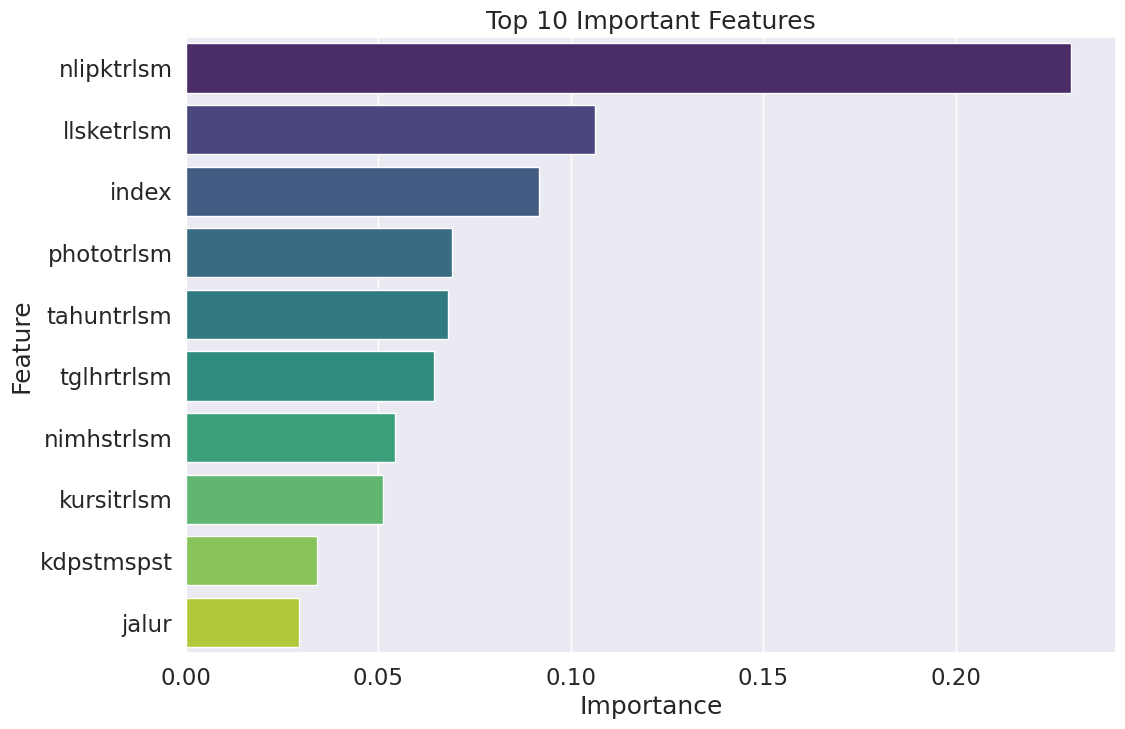

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assuming X and y are defined before this point

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Create a random forest classifier object
rf = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

# Fit the model
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N important features
top_n = 10  # Adjust N as needed
print(f'Top {top_n} important features:')
print(feature_importance_df.head(top_n))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features')
plt.show()


In [ ]:
# Select features
features = ['nlipktrlsm', 'llsketrlsm', 'index']

In [ ]:
X = train_cleaned[features]
y = train_cleaned['tepat_waktu']

###Model Building

In [ ]:
# Choose a machine learning model (Random Forest Classifier)
model = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=None)

In [ ]:
# Train the model
model.fit(X, y)

RandomForestClassifier(random_state=0)

##Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [ ]:
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

blue_cmap = ListedColormap(['white', 'blue'])
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports and confusion matrix
    '''
    # Set font scale
    sns.set(font_scale=1.5)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')

    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))


    # Report desired results as a summary in the form of a table
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax1.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 4.2)
    table.set_fontsize(12)
    ax1.axis('tight')
    # Hide the axes
    ax1.axis('off')
    # set the title
    ax1.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('orangered')

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=blue_cmap, ax=ax2)
    ax2.set_title('Confusion Matrix for Test Data')
    ax2.grid(False)

    plt.tight_layout()
    plt.show()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1454
        True       1.00      1.00      1.00      1240

    accuracy                           1.00      2694
   macro avg       1.00      1.00      1.00      2694
weighted avg       1.00      1.00      1.00      2694


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

       False       0.92      0.95      0.94       364
        True       0.94      0.91      0.92       310

    accuracy                           0.93       674
   macro avg       0.93      0.93      0.93       674
weighted avg       0.93      0.93      0.93       674





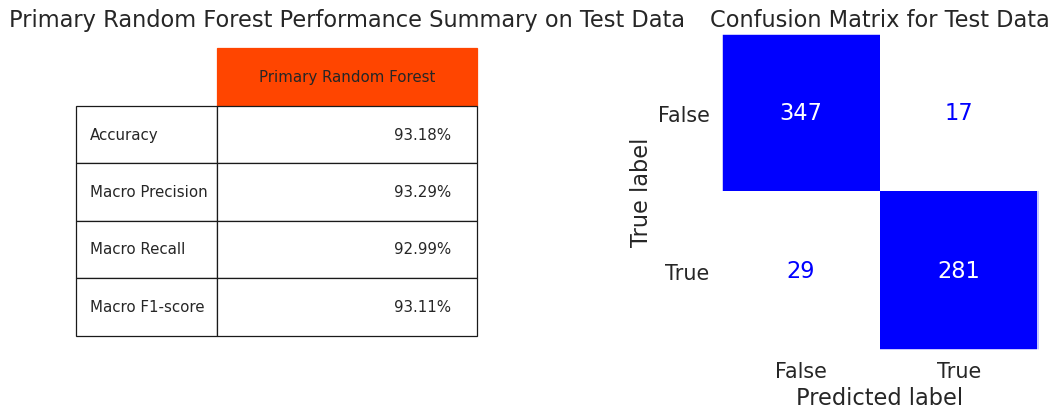

In [ ]:
model_evaluation(rf, X_train, X_test, y_train, y_test, 'Primary Random Forest')

In [ ]:
# Save the final performance of SVM classifier
rf_result = metrics_calculator(rf, X_test, y_test, 'RF')

In [ ]:
# Make predictions on the test set
test_features = test[features]
predictions = model.predict(test_features)

# Create a DataFrame with 'index' and 'tepat_waktu' columns
output_df = pd.DataFrame({'index': test['index'], 'tepat_waktu': predictions.astype(bool)})
output_df.to_csv('predictionfinal.csv', index=False)
